In [99]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from my_functions import initial_analysis
from my_functions import create_plot
from my_functions import plot_confusion_matrix

from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Filter out specified warnings
warnings.filterwarnings("ignore", message="No further splits with positive gain")
warnings.filterwarnings("ignore", message="Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth")

# Introduction and Goals

> Introduction

Welcome to my Notebook, prepared by the Data Analytics Team at The Johns Hopkins Hospital. As a leading institution in healthcare and medical research, we are constantly seeking innovative ways to enhance patient care and outcomes. In this notebook, we embark on an important journey to leverage the power of data and machine learning to address one of the most critical health challenges: stroke prediction.

Strokes are a leading cause of disability and mortality worldwide, with millions of people affected each year. "Stroke is currently the second-leading cause of death, the third-leading cause of disability worldwide" (1). The ability to accurately predict stroke risk can be a game-changer in preventive healthcare. By identifying patients at high risk, we can implement targeted interventions, provide personalized advice, and prepare both patients and their families for swift action in case of an emergency. This proactive approach not only has the potential to save lives but also to significantly improve the quality of life for those at risk.

1. https://www.weforum.org/agenda/2023/10/strokes-could-cause-10-million-deaths-by-2050-and-other-health-stories-you-need-to-read-this-week/#:~:text=Stroke%20is%20currently%20the%20second%2Dleading%20cause%20of%20death%2C%20the,a%20major%20cause%20of%20dementia.

> Methodology and Thinking

1. **Data Exploration and Cleaning**: I will begin by examining the dataset and cleaning it to ensure it is suitable for analysis and modeling. This includes handling missing values, outliers, and any inconsistencies in the data.

2. **Feature Engineering**: Recognizing the complex nature of stroke risk factors, I will engage in thoughtful feature engineering where appropriate to enhance model performance and interpretability.

3. **Model Development**: With a clean dataset, I will explore various machine learning algorithms to develop a model that offers the best balance between accuracy, reliability, and interpretability. My focus will be on models that can provide actionable insights for healthcare professionals.

4. **Validation and Evaluation**: Testing and validation will be conducted to assess the model's performance. I will use appropriate metrics to evaluate each one.

> Goal

- To predict if a patient will have a stroke.

# Initial Analysis with Pandas

In [100]:
strokedf = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [101]:
initial_analysis(strokedf)

(5110, 12)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


None

id contains 5110 unique values
gender contains 3 unique values
age contains 104 unique values
hypertension contains 2 unique values
heart_disease contains 2 unique values
ever_married contains 2 unique values
work_type contains 5 unique values
Residence_type contains 2 unique values
avg_glucose_level contains 3979 unique values
bmi contains 418 unique values
smoking_status contains 4 unique values
stroke contains 2 unique values
The dataframe contains 0 duplicated values


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [102]:
work_type_value_counts = strokedf['work_type'].value_counts()
print(work_type_value_counts)

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


In [103]:
smoking_status_value_counts = strokedf['smoking_status'].value_counts()
print(smoking_status_value_counts)

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [104]:
gender_value_counts = strokedf['gender'].value_counts()
print(gender_value_counts)

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


> The dataset contains 12 features, 4 numerical and 8 categorical. 

> The data *looks* largely clean with only the BMI column containing some missing values and no duplicates. However, I want to remove the id column and see if the no duplicates status remains and I'm going to change the datatype of the age column to integer since it's all whole numbers. I also want to change the capital R in the 'Residence_type' column and the letter case in the 'smoking_status' column to match the rest of the dataset. Additionally, I see that the 'gender' column has 3 unique values and I that 'smoking_status' had an "unknown" value. I want to fix the unknown value in the 'gender' column and investigate further into 'smoking_status'. Lastly, the 'work_type' column has some participants that have never worked and I want to look into that as well just to make sure it makes sense. 

# Data Cleaning

Issues 
- 'id' column is not needed. 
- 'age' column is full of integers but has a float data type. 
- 'bmi' has missing values.
- 'Residence_type' uses a capital letter when none of the other columns do. 
- 'smoking_status' contains some rows with no capitals and some with. 
- 'gender' contains a row with an Other value.
- 'smoking_status' contains rows with unknown values.
- 'work_type' contains rows with participants that have never worked.

Solutions 
- Drop 'id' column. 
- Fix data type for 'age' column.
- Investigate the missing values in 'bmi' to determine best solution.
- Fix the case in the "Residence_type' column.
- Change capitals in the 'smoking_status' column to match the rest of the dataset. 
- Change the Other value in the 'gender' column to the mode. 
- Investigate the unknown values in the 'smoking_status' column. 
- Look into the rows with Never_worked values. 

In [105]:
stroke_to_clean = strokedf.copy()

In [106]:
stroke_to_clean['age'] = stroke_to_clean['age'].astype('int64')
stroke_to_clean.rename(columns={"Residence_type": "residence_type"})

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [107]:
stroke_to_clean.drop(columns=['id'], inplace=True)

In [108]:
stroke_to_clean.smoking_status = stroke_to_clean.smoking_status.str.capitalize()

In [109]:
mode_gender = stroke_to_clean['gender'].mode()[0]

In [110]:
stroke_to_clean['gender'] = stroke_to_clean['gender'].replace('Other', mode_gender)

In [111]:
gender_value_counts = stroke_to_clean['gender'].value_counts()
print(gender_value_counts)

Female    2995
Male      2115
Name: gender, dtype: int64


In [112]:
unknown_smoking_status_df = stroke_to_clean[
    stroke_to_clean['smoking_status'] == 'Unknown'].copy()

In [113]:
unknown_smoking_status_df.sample(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2569,Male,59,0,0,Yes,Private,Rural,203.16,43.4,Unknown,0
3685,Female,2,0,0,No,children,Urban,82.30,18.8,Unknown,0
844,Male,1,0,0,No,children,Rural,89.30,21.4,Unknown,0
2643,Female,62,0,0,Yes,Private,Rural,72.19,22.4,Unknown,0
2429,Male,14,0,0,No,Self-employed,Urban,187.22,29.7,Unknown,0
2887,Female,17,0,0,No,Private,Urban,87.39,24.6,Unknown,0
3859,Male,0,0,0,No,children,Urban,89.04,17.8,Unknown,0
1784,Female,37,0,0,Yes,Private,Urban,74.51,29.5,Unknown,0
383,Male,5,0,0,No,children,Rural,85.84,16.4,Unknown,0
4108,Male,29,0,0,Yes,Private,Urban,70.51,24.5,Unknown,0


In [114]:
stroke_to_clean.loc[(stroke_to_clean['age'] <= 17) & 
                    (stroke_to_clean['smoking_status'] == 'Unknown'), 
                    'smoking_status'] = 'Never smoked'

In [115]:
smoking_status_value_counts = stroke_to_clean['smoking_status'].value_counts()
print(smoking_status_value_counts)

Never smoked       2574
Formerly smoked     885
Unknown             862
Smokes              789
Name: smoking_status, dtype: int64


In [116]:
never_worked_status_df = stroke_to_clean[
    stroke_to_clean['work_type'] == 'Never_worked'].copy()

In [117]:
never_worked_status_df.sample(22)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
886,Female,19,0,0,No,Never_worked,Urban,86.96,25.8,Never smoked,0
3468,Male,17,0,0,No,Never_worked,Rural,124.38,31.2,Never smoked,0
2721,Female,17,0,0,No,Never_worked,Rural,88.57,31.1,Never smoked,0
253,Male,14,0,0,No,Never_worked,Rural,161.28,19.1,Never smoked,0
4611,Female,17,0,0,No,Never_worked,Urban,78.08,44.9,Never smoked,0
2346,Female,14,0,0,No,Never_worked,Urban,148.37,22.7,Never smoked,0
2917,Female,18,0,0,No,Never_worked,Urban,82.36,22.7,Unknown,0
2740,Male,15,0,0,No,Never_worked,Rural,79.59,28.4,Never smoked,0
603,Male,23,0,0,No,Never_worked,Urban,125.26,18.7,Never smoked,0
939,Male,13,0,0,No,Never_worked,Rural,111.48,20.8,Never smoked,0


In [118]:
stroke_to_clean.loc[(stroke_to_clean['age'] <= 17) & 
                    (stroke_to_clean['work_type'] == 'Never_worked'), 
                    'work_type'] = 'children'

In [119]:
work_type_value_counts = stroke_to_clean['work_type'].value_counts()
print(work_type_value_counts)

Private          2925
Self-employed     819
children          704
Govt_job          657
Never_worked        5
Name: work_type, dtype: int64


In [120]:
stroke_to_clean.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,Formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,Never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,Never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,Smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,Never smoked,1


In [121]:
stroke_to_clean.duplicated().sum()

0

In [122]:
rows_with_nan = stroke_to_clean.isnull().any(axis=1)
missing_values_df = stroke_to_clean[rows_with_nan]

In [123]:
missing_values_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,Never smoked,1
8,Female,59,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1


In [124]:
missing_values_df.shape

(201, 11)

In [125]:
value_counts_perc = missing_values_df['stroke'].value_counts(normalize=True) * 100
print(value_counts_perc)

0    80.099502
1    19.900498
Name: stroke, dtype: float64


In [126]:
value_counts_toclean_perc = stroke_to_clean['stroke'].value_counts(normalize=True) * 100
print(value_counts_toclean_perc)

0    95.127202
1     4.872798
Name: stroke, dtype: float64


In [127]:
stroke_to_clean = stroke_to_clean.dropna()

In [128]:
stroke_to_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   int64  
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 460.2+ KB


> Okay, great! After removing the 'id' column there are still no duplicates, the data types are all set, and the number of missing values was low enough compared to the size of the dataset that I feel comfortable removing those rows. I changed the singular "Other" value in the gender column to the mode, changed the unknowns in the smoking_status column to never smoked if the age was 17 or lower, and changed the rows with "never worked" to "children" if the age was 17 or lower as well. Now I have a clean dataset to export! 

In [129]:
stroke_to_clean.to_csv(r'healthcare_stroke_data_clean.csv', index=False, header=True)

# Outlier Detection

In [130]:
stroke_df = pd.read_csv('healthcare_stroke_data_clean.csv')

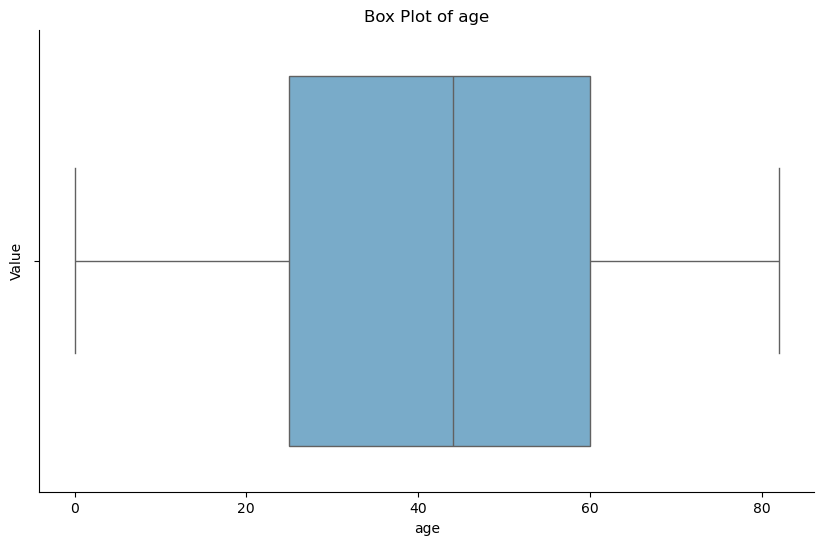

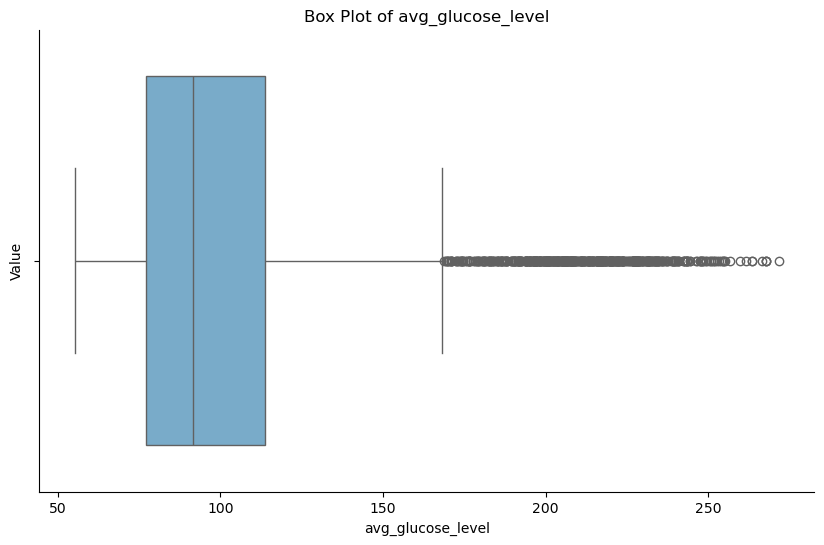

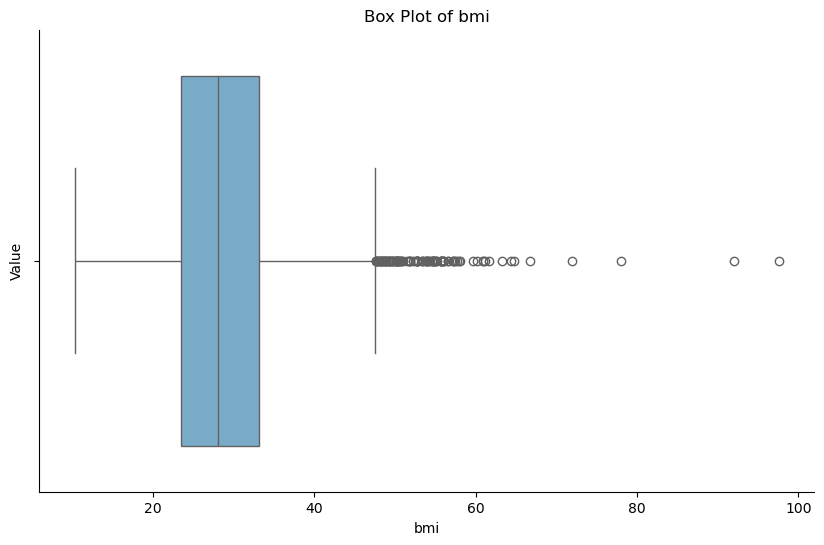

In [131]:
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

for col in numerical_columns:
    create_plot(stroke_df, 
                col, 
                None, 
                'box', 
                f'Box Plot of {col}', 
                col, 
                'Value')

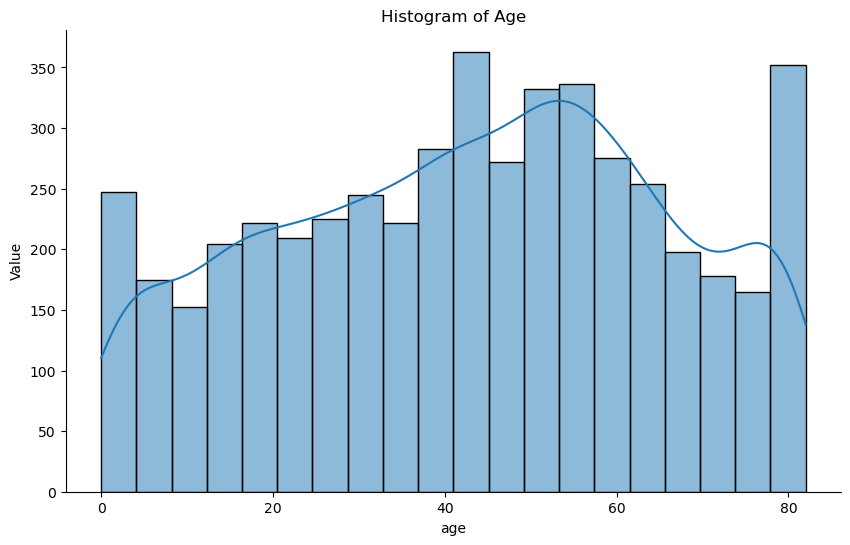

In [132]:
create_plot(stroke_df, 
            'age', 
            None, 
            'hist', 
            f'Histogram of Age', 
            'age', 
            'Value')

> Presence of Outliers in the 'avg_glucose_level' and 'bmi' columns

- There are a number of outliers in both of these columns which I'm going to keep because they can represent individuals who are at an extreme risk of stroke. I want the model to be capable of indentifying and assessing risk for people who fall outside the typical range. 
- Keeping the outliers can also improve my model's robustness and help it perform better when faced with new data that might include extreme cases. 
- There might also be patterns related to the outliers specifically which I'll look for later.
- Most importantly, from a medical perspective predicting and understanding these high-risk cases can be particularly valuable for preventing strokes and managing patient care. 

> Age 

- Given the wide spread of ages we have, I want to create an age group column that I think will help me in my ultimate goal of creating a model. "The risk increases with age, the incidence doubling with each decade after the age of 45 years and over 70% of all strokes occur above the age of 65." (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3006180/) 

# Feature Engineering

> BMI

- I looked to the World Health Organization for information on BMI ranges. 
- Here they state: "The values for body mass index (BMI) are age-independent for adult populations and are the same for both genders." (https://www.who.int/data/nutrition/nlis/info/malnutrition-in-women#:~:text=BMI%20%3C18.5%3A%20underweight,BMI%20%E2%89%A530.0%3A%20obesity.)
- The values for my BMI buckets for adults come from this webpage: "For adults over 20 years old, BMI falls into one of the following categories." (https://www.who.int/europe/news-room/fact-sheets/item/a-healthy-lifestyle---who-recommendations)

> Age

- Given what I read earlier: "The risk increases with age, the incidence doubling with each decade after the age of 45 years and over 70% of all strokes occur above the age of 65." (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3006180/) ... I'm going to create age buckets this in mind, creating smaller segments of 10 years for adults 45 and older. 

In [133]:
stroke_df_with_features = stroke_df.copy()

In [134]:
def bmi_categories(row):
    if row['age'] <= 19:
        return 'Younger than 20'
    else:
        if row['bmi'] < 18.5:
            return 'Underweight'
        elif 18.5 <= row['bmi'] <= 24.9:
            return 'Normal weight'
        elif 25.0 <= row['bmi'] <= 29.9:
            return 'Pre-obesity'
        elif 30.0 <= row['bmi'] <= 34.9:
            return 'Obesity class I'
        elif 35.0 <= row['bmi'] <= 39.9:
            return 'Obesity class II'
        else:
            return 'Obesity class III'

stroke_df_with_features['bmi_category'] = stroke_df_with_features.apply(
    bmi_categories, axis=1)

stroke_df_with_features.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_category
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,Formerly smoked,1,Obesity class II
1,Male,80,0,1,Yes,Private,Rural,105.92,32.5,Never smoked,1,Obesity class I
2,Female,49,0,0,Yes,Private,Urban,171.23,34.4,Smokes,1,Obesity class I
3,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,Never smoked,1,Normal weight
4,Male,81,0,0,Yes,Private,Urban,186.21,29.0,Formerly smoked,1,Pre-obesity


In [135]:
def age_groups(row):
    age = row['age']
    if age <= 1:
        return 'Infants'
    elif age <= 12:
        return 'Children'
    elif age <= 18:
        return 'Adolescents'
    elif age <= 33:
        return 'Young Adults'
    elif age <= 44:
        return 'Adults 34-44'
    elif age <= 54:
        return 'Adults 45-54'
    elif age <= 64:
        return 'Adults 55-64'
    elif age <= 74:
        return 'Seniors 65-74'
    else:
        return 'Seniors 75+'

stroke_df_with_features['age_group'] = stroke_df_with_features.apply(
    age_groups, axis=1)

stroke_df_with_features.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_category,age_group
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,Formerly smoked,1,Obesity class II,Seniors 65-74
1,Male,80,0,1,Yes,Private,Rural,105.92,32.5,Never smoked,1,Obesity class I,Seniors 75+
2,Female,49,0,0,Yes,Private,Urban,171.23,34.4,Smokes,1,Obesity class I,Adults 45-54
3,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,Never smoked,1,Normal weight,Seniors 75+
4,Male,81,0,0,Yes,Private,Urban,186.21,29.0,Formerly smoked,1,Pre-obesity,Seniors 75+


In [136]:
stroke_df_with_features.to_csv(r'healthcare_stroke_data_clean_with_features.csv', 
                               index=False, header=True)

In [137]:
stroke_df_with_features = pd.read_csv('healthcare_stroke_data_clean_with_features.csv')

# Splitting Data (train and test sets)

I'm deciding I want to perform the exploratory analysis on only my training dataset to avoid data leakage 

- If I notice during the EDA that a particular feature strongly correlates with the target variable across the entire dataset, I might decide to give that feature more importance in my model. However, if this insight comes from observing the test set, I would be indirectly using information from the test set to train your model.
- Also, I might identify patterns or anomalies. If I then decide to remove these or adjust the data based on these insights from the entire dataset, I might inadvertently make decisions based on what's in the test set. This could lead to my model being "prepared" for specific quirks or patterns in the test data that it wouldn't otherwise know about.

This means I need to perform the spliiting of the data now. My intention is to create the baseline model on the clean data without the features I engineered and then run the same model with the engineered data, so I'll prepare them both now. 

In [138]:
stroke_df_with_features.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'bmi_category', 'age_group'],
      dtype='object')

In [139]:
stroke_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

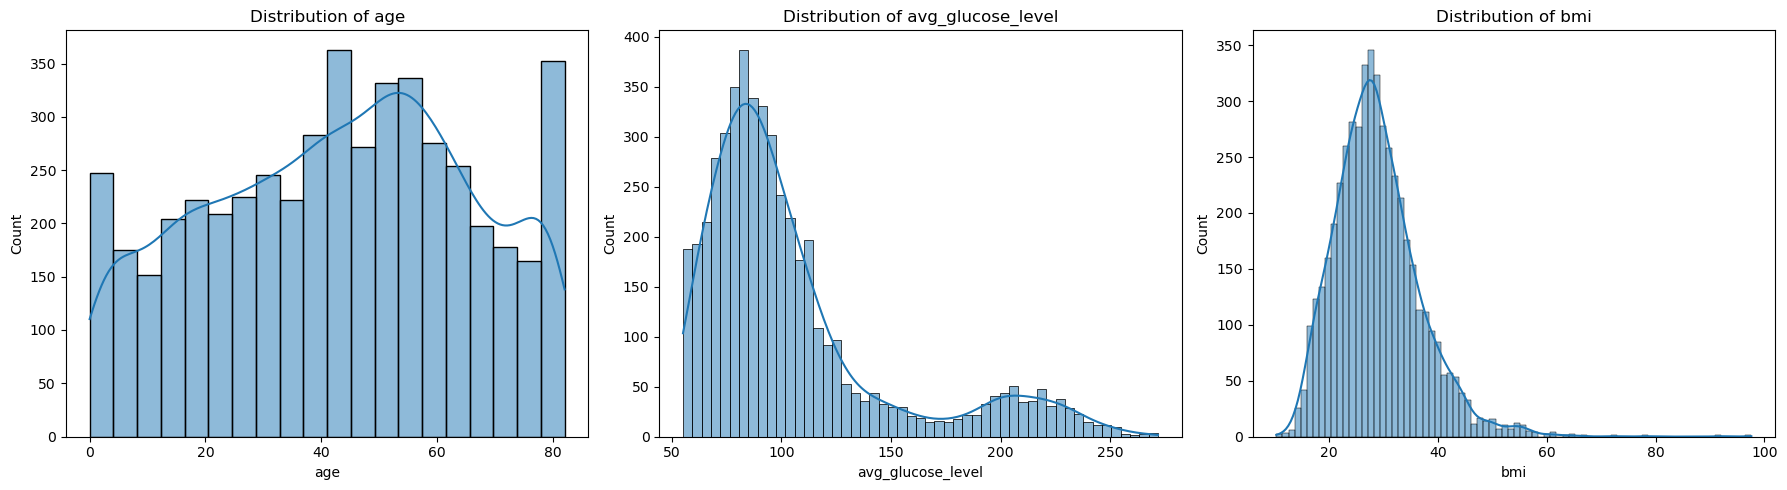

In [140]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(['age', 'avg_glucose_level', 'bmi']):
    sns.histplot(stroke_df_with_features[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [141]:
from scipy.stats import shapiro

numerical_columns = ['age', 'avg_glucose_level', 'bmi']
for col in numerical_columns:
    stat, p = shapiro(stroke_df_with_features[col])
    print(f'{col}: Statistics={stat}, p={p}')
    if p > 0.05:
        print(f'  The distribution of {col} looks Gaussian (fail to reject H0)')
    else:
        print(f'  The distribution of {col} does not look Gaussian (reject H0)')

age: Statistics=0.9686665907886192, p=1.961119689148366e-31
  The distribution of age does not look Gaussian (reject H0)
avg_glucose_level: Statistics=0.8058307159155521, p=1.1737272269119706e-60
  The distribution of avg_glucose_level does not look Gaussian (reject H0)
bmi: Statistics=0.9535468320743545, p=6.615876600227794e-37
  The distribution of bmi does not look Gaussian (reject H0)


In [142]:
from sklearn.model_selection import train_test_split

X = stroke_df.drop('stroke', axis=1)
y = stroke_df['stroke']

X_feat = stroke_df_with_features.drop('stroke', axis=1)
y_feat = stroke_df_with_features['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)
X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(
    X_feat, y_feat, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train_feat.shape, X_test_feat.shape, y_train_feat.shape, y_test_feat.shape

((3927, 12), (982, 12), (3927,), (982,))

> I want to note that I've chosen to utilize stratify to make sure that the train-test split will have the same distribution of the target variable as the original dataset. I believe this important for these reasons: 

- This dataset has a huge class imbalance. The number of individuals who have experienced a stroke is much smaller than those who haven't. I want to make sure that the target variable ('stroke') consistently represented in both the training and testing datasets to prevent my model from being biased towards the majority class (people who haven't had a stroke).

- I want to make sure that the model is tested under conditions that closely mimic real-world scenarios. This is especially important because the intention is to utilize the model in a medical applications where its ability to correctly identify positive cases (such as predicting a stroke) can have significant implications.

- By maintaining the same proportion of classes in both training and testing sets as in the original dataset, I'm more likely to develop a model that generalizes well to unseen data.

### For the dataset with only the original features

In [143]:
print(f"The size of the X training set has this many rows and columns: {X_train.shape}")
print(f"The size of the X testing set has this many rows and columns: {X_test.shape}")
print(f"The size of the Y training set has this many rows and columns: {y_train.shape}")
print(f"The size of the Y testing set has this many rows and columns: {y_test.shape}")

The size of the X training set has this many rows and columns: (3927, 10)
The size of the X testing set has this many rows and columns: (982, 10)
The size of the Y training set has this many rows and columns: (3927,)
The size of the Y testing set has this many rows and columns: (982,)


### For the dataset with engineered features

In [144]:
print(f"The size of the X training set has this many rows and columns: {X_train_feat.shape}")
print(f"The size of the X testing set has this many rows and columns: {X_test_feat.shape}")
print(f"The size of the Y training set has this many rows and columns: {y_train_feat.shape}")
print(f"The size of the Y testing set has this many rows and columns: {y_test_feat.shape}")

The size of the X training set has this many rows and columns: (3927, 12)
The size of the X testing set has this many rows and columns: (982, 12)
The size of the Y training set has this many rows and columns: (3927,)
The size of the Y testing set has this many rows and columns: (982,)


In [145]:
X_train_feat_df = pd.DataFrame(X_train_feat, columns=X_feat.columns)
X_train_feat_df.to_csv(r'stroke_data_X_train_feat_df.csv', index=False, header=True)

In [146]:
X_train_feat_df = pd.read_csv('stroke_data_X_train_feat_df.csv')

# Exploratory Analysis

In [147]:
X_train_feat_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'bmi_category', 'age_group'],
      dtype='object')

In [148]:
X_train_feat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3927 entries, 0 to 3926
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3927 non-null   object 
 1   age                3927 non-null   int64  
 2   hypertension       3927 non-null   int64  
 3   heart_disease      3927 non-null   int64  
 4   ever_married       3927 non-null   object 
 5   work_type          3927 non-null   object 
 6   Residence_type     3927 non-null   object 
 7   avg_glucose_level  3927 non-null   float64
 8   bmi                3927 non-null   float64
 9   smoking_status     3927 non-null   object 
 10  bmi_category       3927 non-null   object 
 11  age_group          3927 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 368.3+ KB


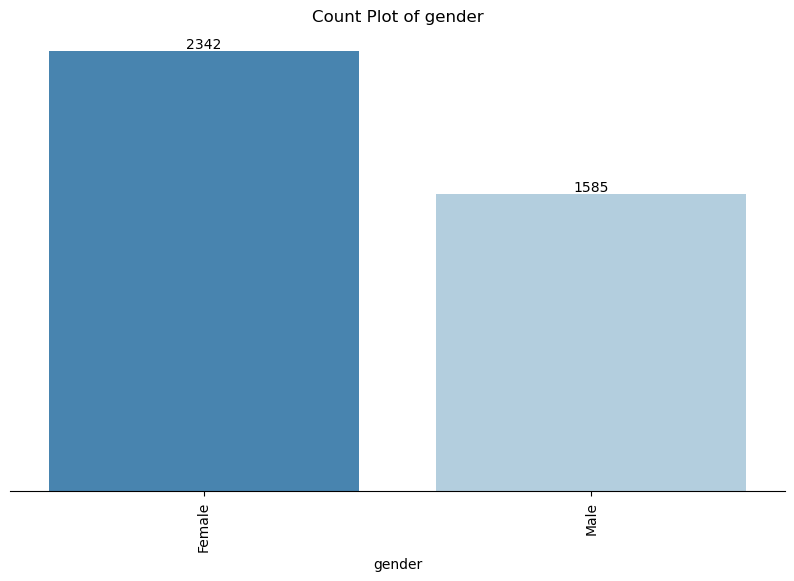

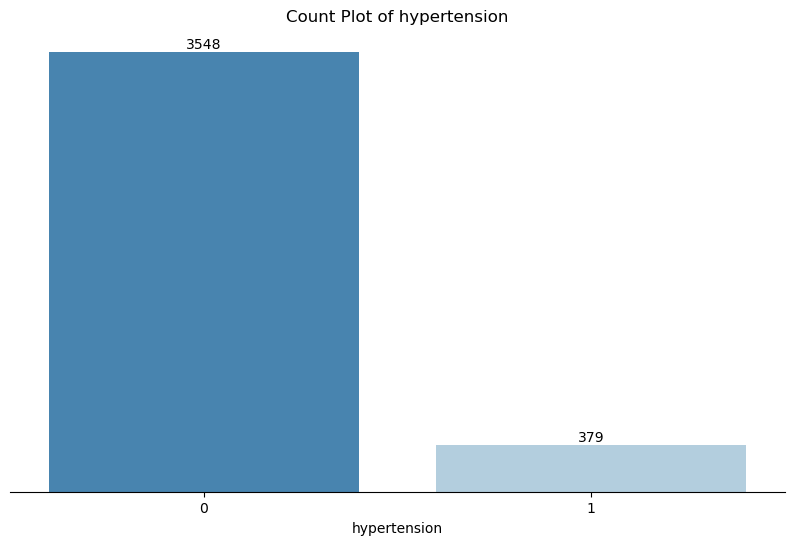

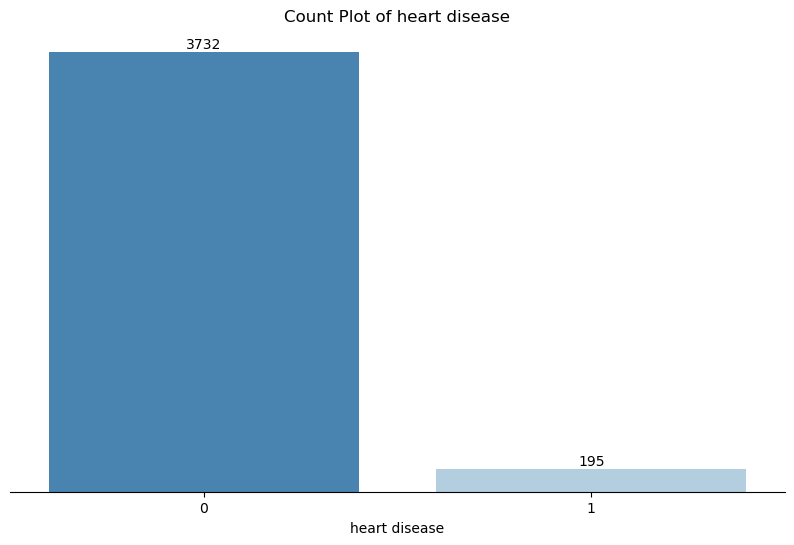

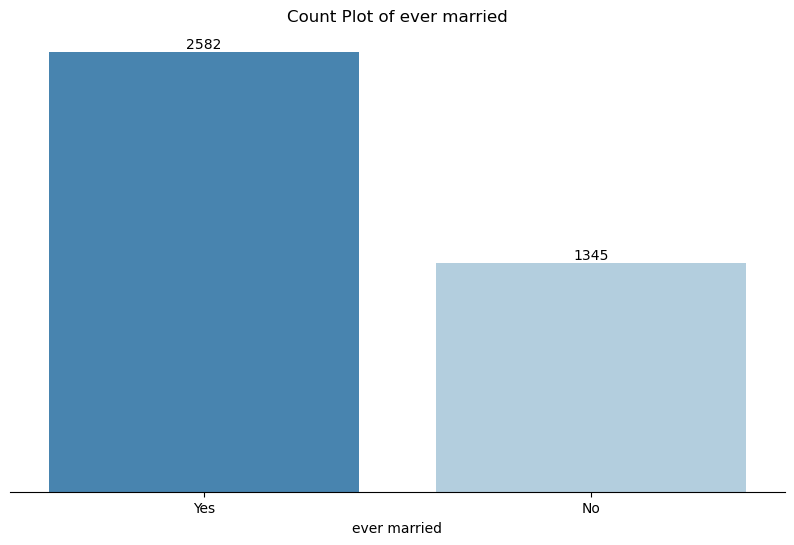

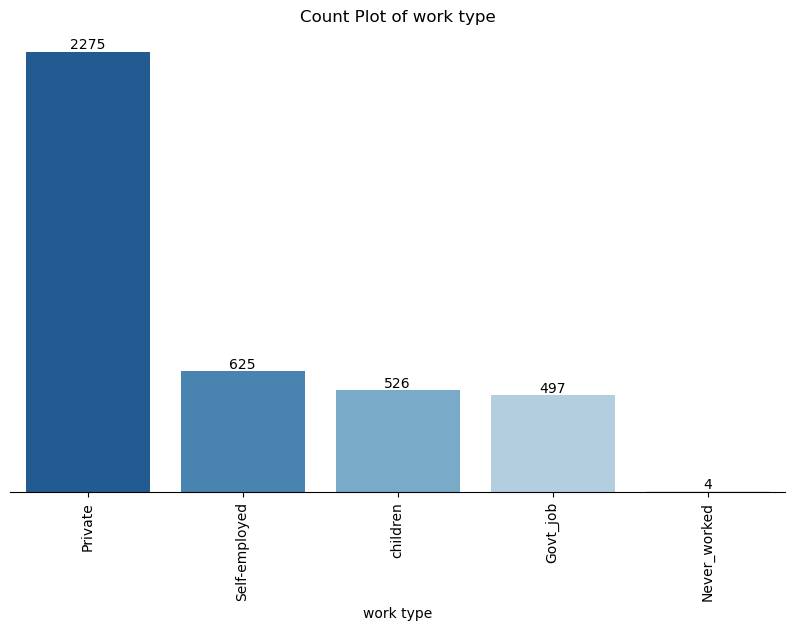

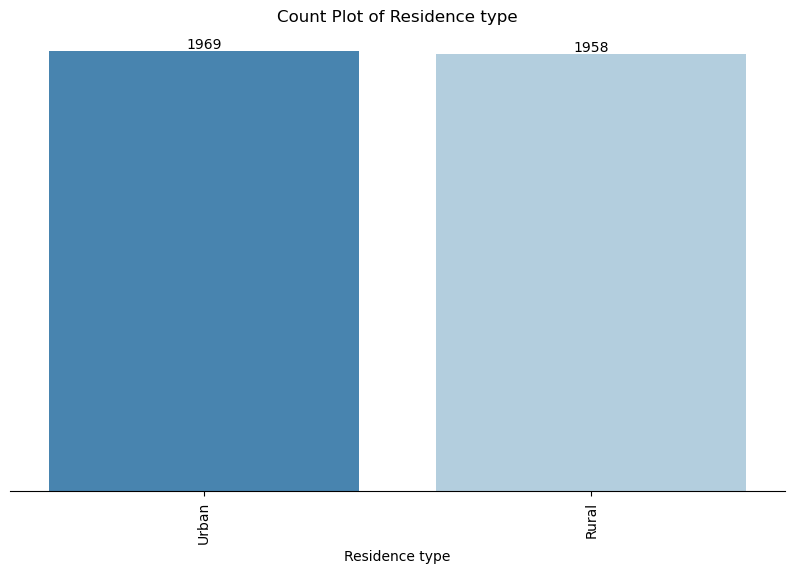

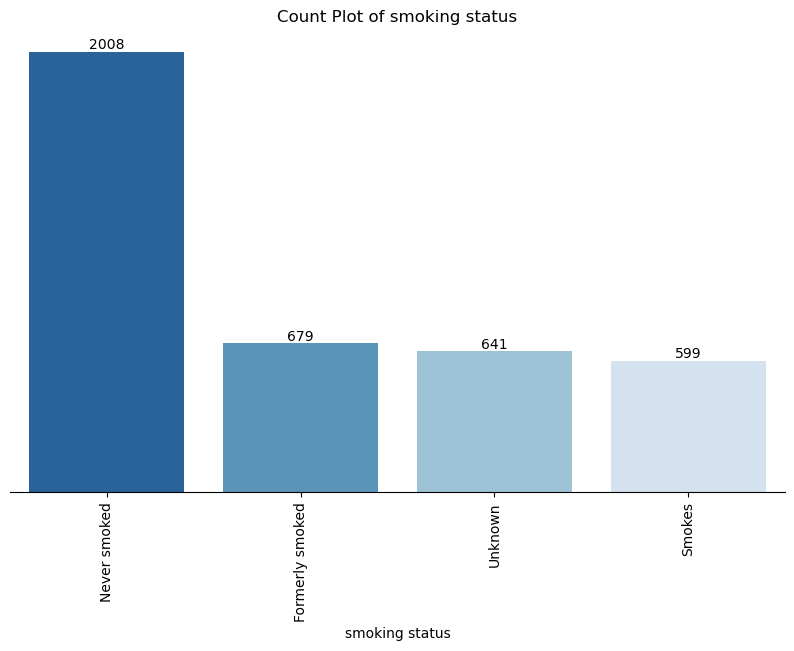

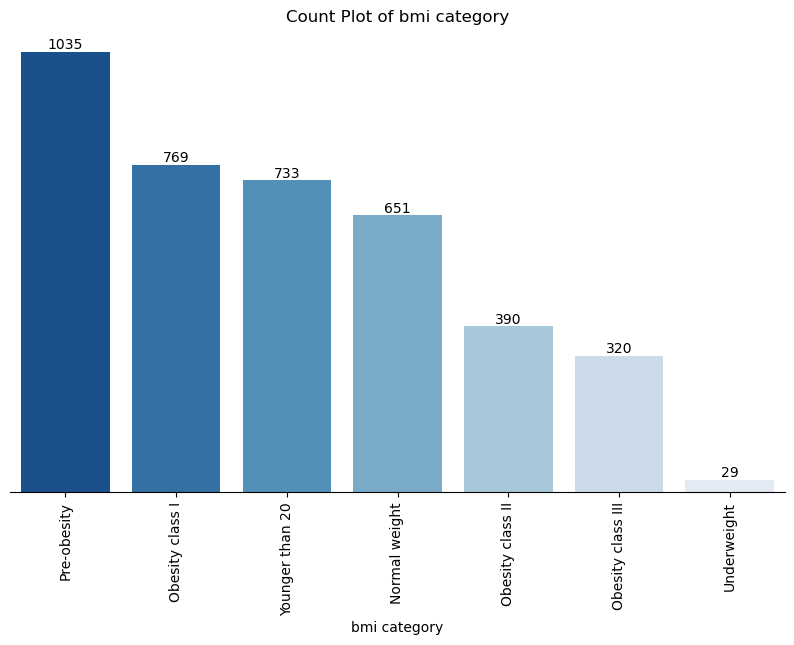

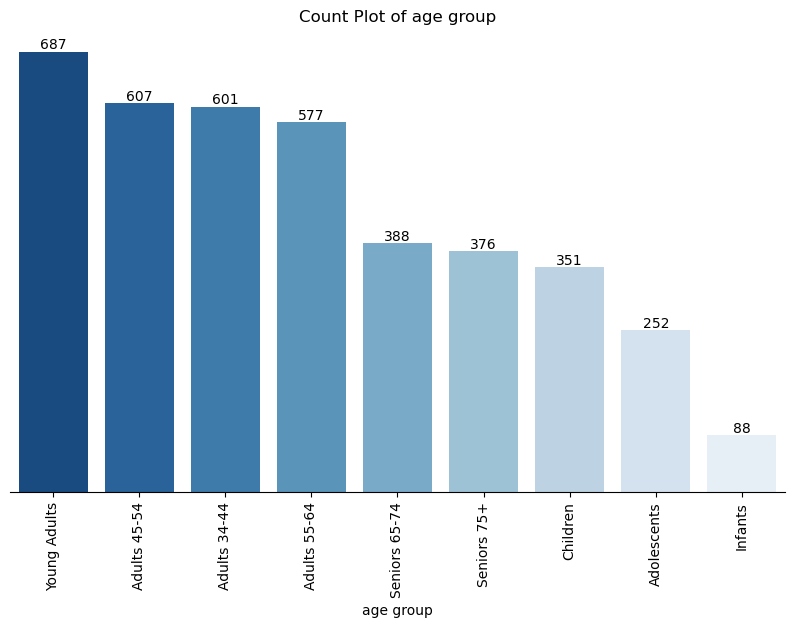

In [149]:
categorical_columns = ['gender', 'hypertension', 'heart_disease', 
                       'ever_married', 'work_type', 'Residence_type', 
                       'smoking_status', 'bmi_category', 'age_group']

for col in categorical_columns:
    # Replace underscores in the column name for the label
    formatted_label = col.replace('_', ' ')
    create_plot(X_train_feat_df, 
                col, 
                None, 
                'count', 
                f'Count Plot of {formatted_label}',  # Use formatted_label for the title
                formatted_label,  # Use formatted_label for the x-axis label
                'Count')

### Categorical Univariate Insights

- Gender: The distribution between genders has a slight predominance of women. 

- Hypertension: A significant majority of individuals do not have hypertension, indicating that it is a less common condition among the participants. 

- Heart Disease: Similar to hypertension, heart disease is less prevalent among the participants. The model might face challenges in learning from heart disease-related patterns due to the smaller number of affected individuals.

- Ever Married: A large portion of the dataset consists of individuals who have been married at some point. This could reflect certain lifestyle factors that might be correlated with stroke risk.

- Work Type: The dataset includes a variety of work types, with 'Private' being the most common. The distribution suggests diverse lifestyle and stress-level factors that could influence stroke risk.

- Residence Type: There's a fairly even distribution between urban and rural residences, suggesting that environmental factors might not be heavily skewed in one direction.

- Smoking Status: The dataset includes several categories related to smoking, with 'never smoked' being predominant. This information is crucial as smoking is a known risk factor for strokes.

- BMI Category: The BMI categories suggest a range of body weight conditions among the participants, from underweight to various obesity classes. Not including those under 20, the majority of participants fall into some level obesity or pre-obesity. 

- Age Group: The age groups show a wide distribution, indicating that the dataset covers a broad spectrum of age-related risk factors for stroke.

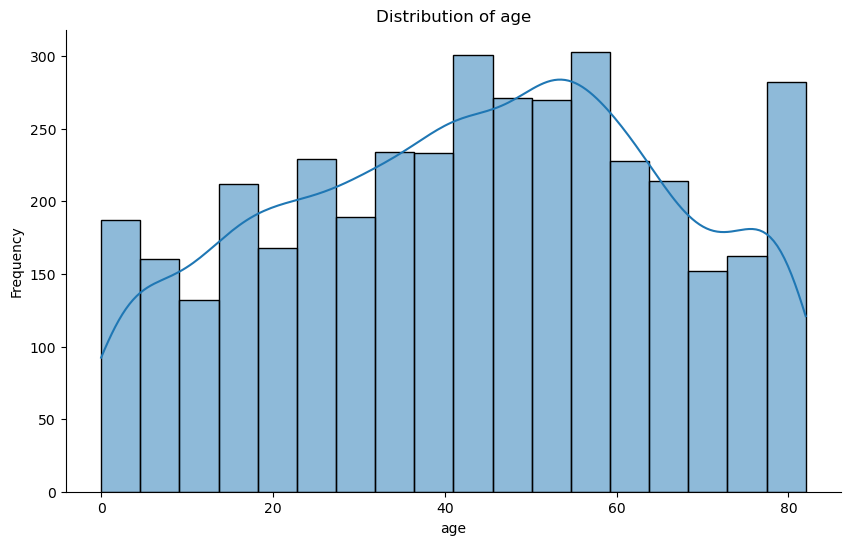

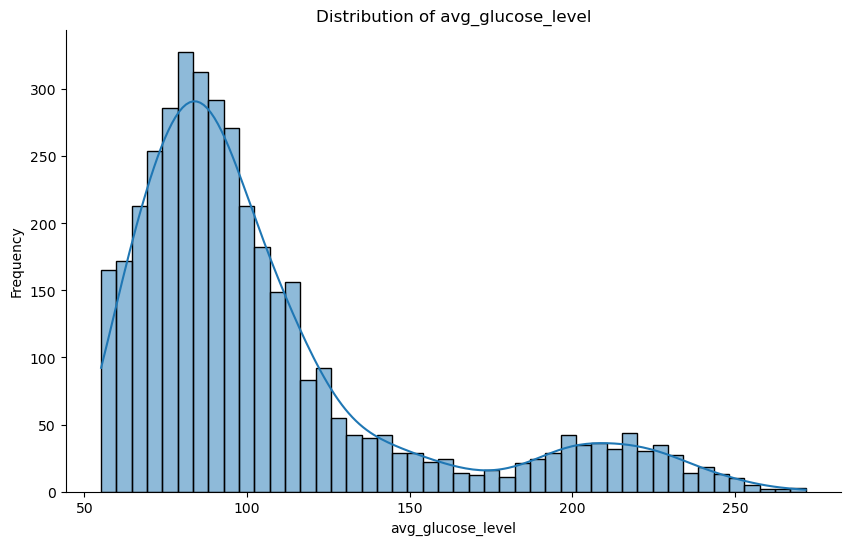

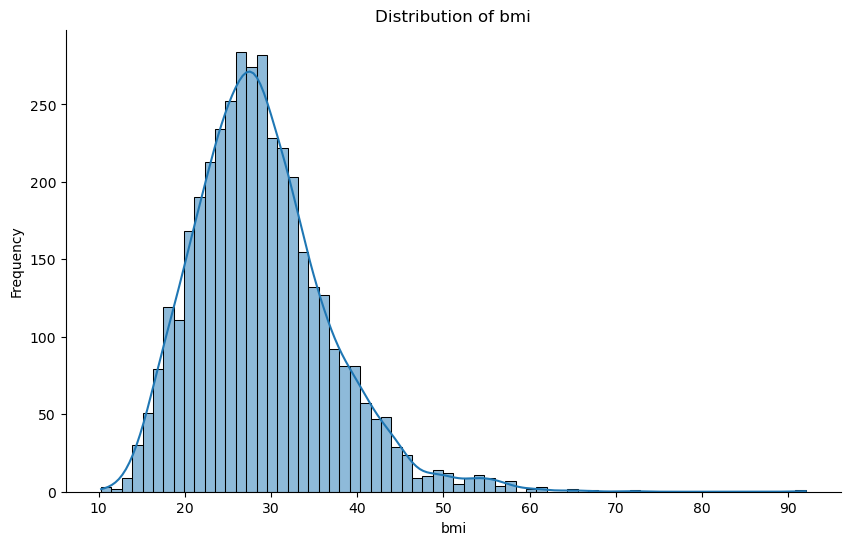

In [150]:
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

for col in numerical_columns:
    create_plot(X_train_feat_df, 
                col, 
                None, 
                'hist',  
                f'Distribution of {col}',  
                col, 
                'Frequency') 

### Numerical Univariate Insights

Age: The distribution of age is somewhat uniform across a wide range but with a noticeable increase in frequency for older age groups.

Average Glucose Level: The distribution of average glucose levels is right-skewed, with a peak in the lower range, indicating that most individuals have glucose levels within a normal or slightly elevated range. However, there's a long tail extending towards higher glucose levels, representing individuals with significantly higher glucose levels, which could be indicative of diabetes or other metabolic conditions associated with an increased risk of stroke.

BMI (Body Mass Index): The BMI distribution is slightly right-skewed, with most individuals falling within the middle range of BMI values, suggesting a mix of normal, overweight, and obese individuals. The right skew indicates a presence of individuals with high BMI values, which could also be indicative of other conditions associated with an increased risk of stroke. 

## Looking into Age-Groups

#### How does the prevalence of hypertension vary across different age groups?

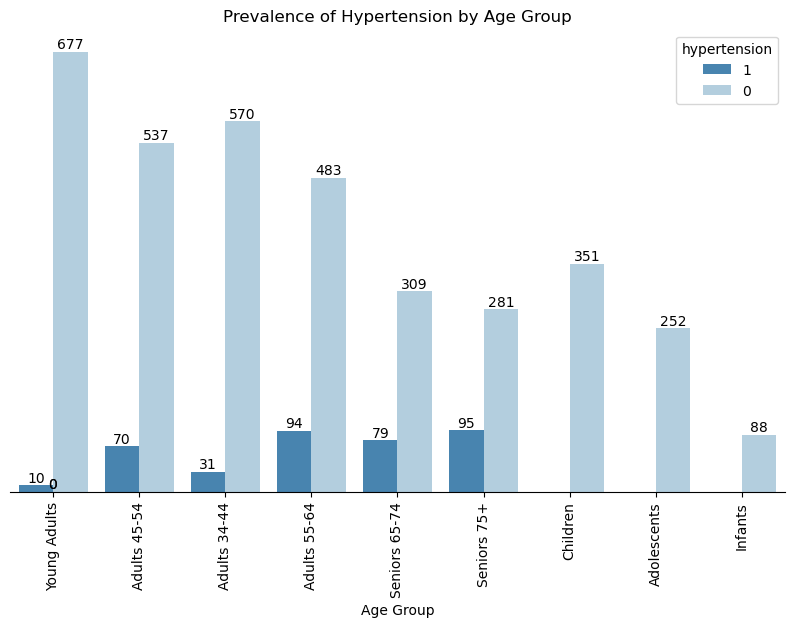

In [151]:
create_plot(X_train_feat_df, 
            'age_group', 
            None, 
            'count', 
            'Prevalence of Hypertension by Age Group', 
            'Age Group', 
            'Count',
            hue='hypertension')

Hypertension prevalence increases with age, becoming significantly more common in older age groups. This trend underscores the importance of monitoring blood pressure as part of age-related health checks. The count plots show an increasing prevalence of hypertension as age increases, where hypertension becomes considerably more common.

#### What is the relationship between BMI categories and age groups?

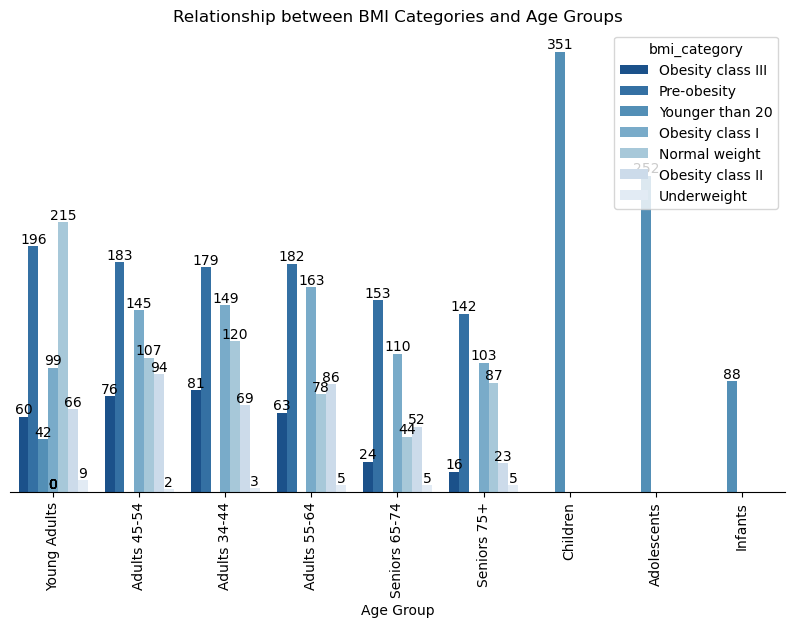

In [152]:
create_plot(X_train_feat_df, 
            'age_group', 
            None, 
            'count', 
            'Relationship between BMI Categories and Age Groups', 
            'Age Group', 
            'Count',
            hue='bmi_category')

Within our dataset, obesity becomes more prevalant with age. The amount of patients at normal weight peak at Young adults and falling to the third highest (or lower) weight bmi category starting with patients of age 34. 

#### Is there a significant difference in average glucose levels between different age groups?

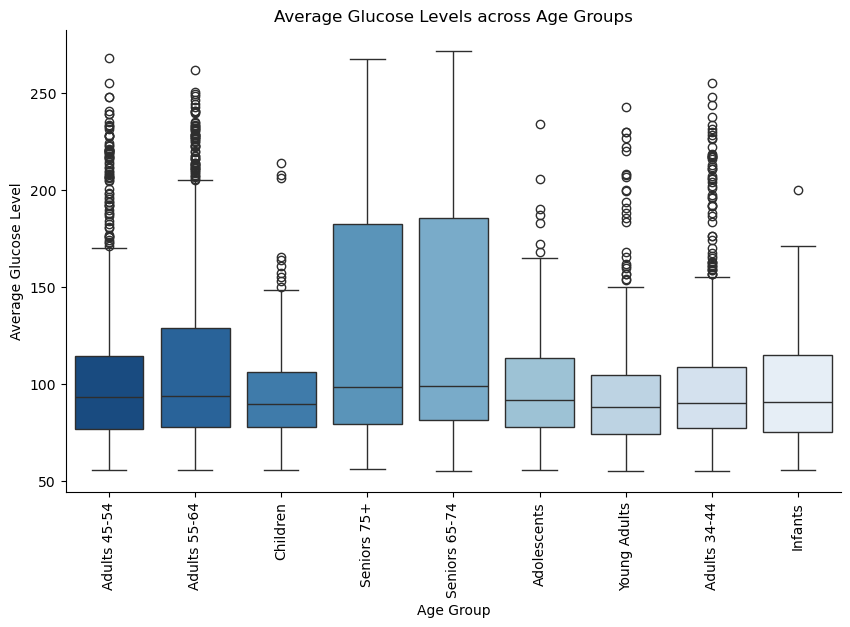

In [153]:
create_plot(X_train_feat_df, 
            'age_group', 
            'avg_glucose_level', 
            'box', 
            'Average Glucose Levels across Age Groups', 
            'Age Group', 
            'Average Glucose Level')

The plots likely show variation in average glucose levels across age groups, with increases in median levels as age advances. It becomes particularly more varied for seniors aged 65 and older, at least for the patients in our dataset. 

#### How does the incidence of heart disease correlate with age groups?

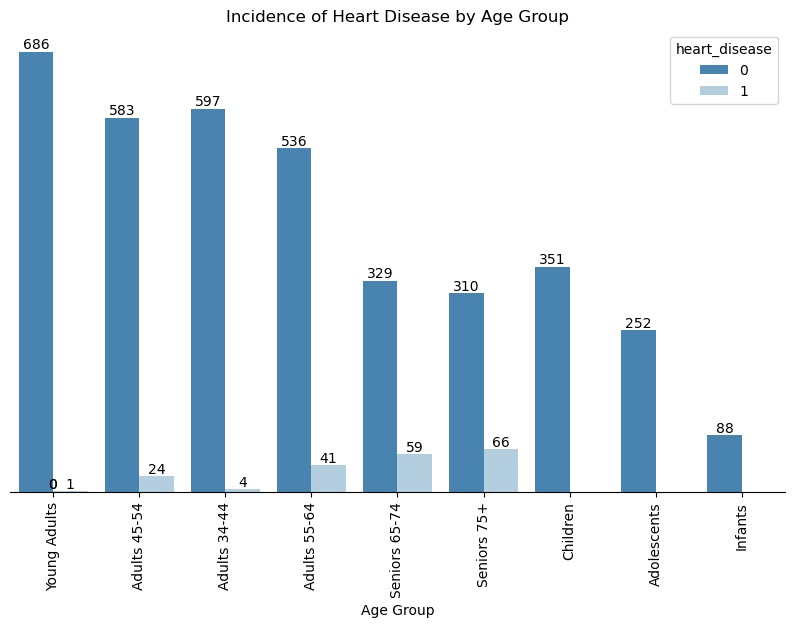

In [154]:
create_plot(X_train_feat_df, 
            'age_group', 
            None, 
            'count', 
            'Incidence of Heart Disease by Age Group', 
            'Age Group', 
            'Count',
            hue='heart_disease')

Similar to hypertension, the incidence of heart disease is higher in older age groups. This pattern emphasizes the importance of cardiovascular health screenings for early detection and management of heart disease in aging populations.

#### How do hypertension and heart disease prevalence jointly vary across different age groups?

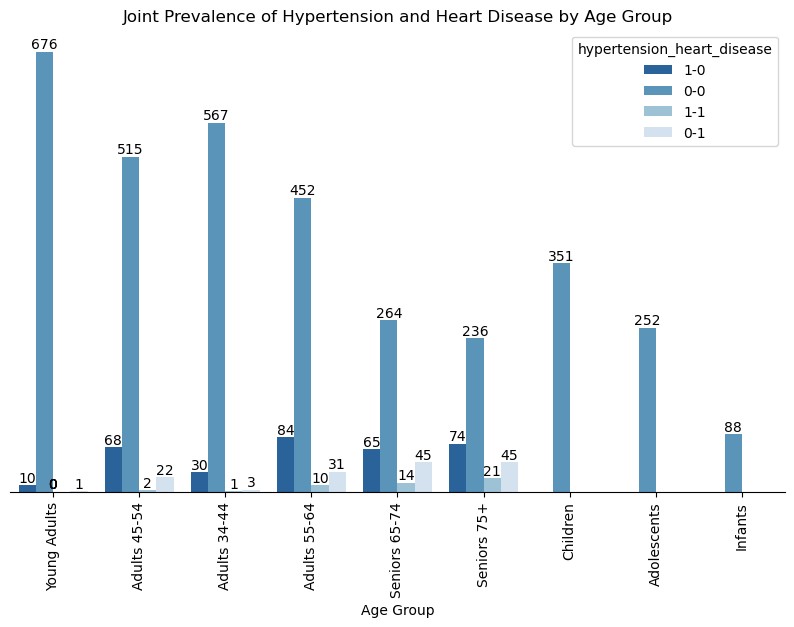

In [155]:
hyp_heart_dis_quest = X_train_feat_df.copy()
hyp_heart_dis_quest['hypertension_heart_disease'] = (
    hyp_heart_dis_quest['hypertension'].astype(str) + '-' + 
    hyp_heart_dis_quest['heart_disease'].astype(str)
)

status_mapping = {
    '0-0': 'No Hypertension/Heart Disease',
    '1-0': 'Hypertension Only',
    '0-1': 'Heart Disease Only',
    '1-1': 'Both Conditions'
}
hyp_heart_dis_quest['hypertension_heart_disease'].map(status_mapping)

create_plot(hyp_heart_dis_quest, 
            'age_group', 
            None, 
            'count', 
            'Joint Prevalence of Hypertension and Heart Disease by Age Group', 
            'Age Group', 
            'Count', 
            hue='hypertension_heart_disease')

Hypertension is more prevalent than heart disease across all age groups. Notably, there's an evident increase in hypertension as age progresses from the "Adults 34-44" group to the "Seniors 65-74" group. The trend seems to decline slightly in the "Seniors 75+" group, which may be due to a survivorship effect, where the healthiest of the elderly are over-represented since those with severe conditions may not be included in the dataset.The prevalence of heart disease alone is relatively lower and appears consistent across adult age groups but slightly increases in senior age groups, which is typical given that heart disease risk increases with age.

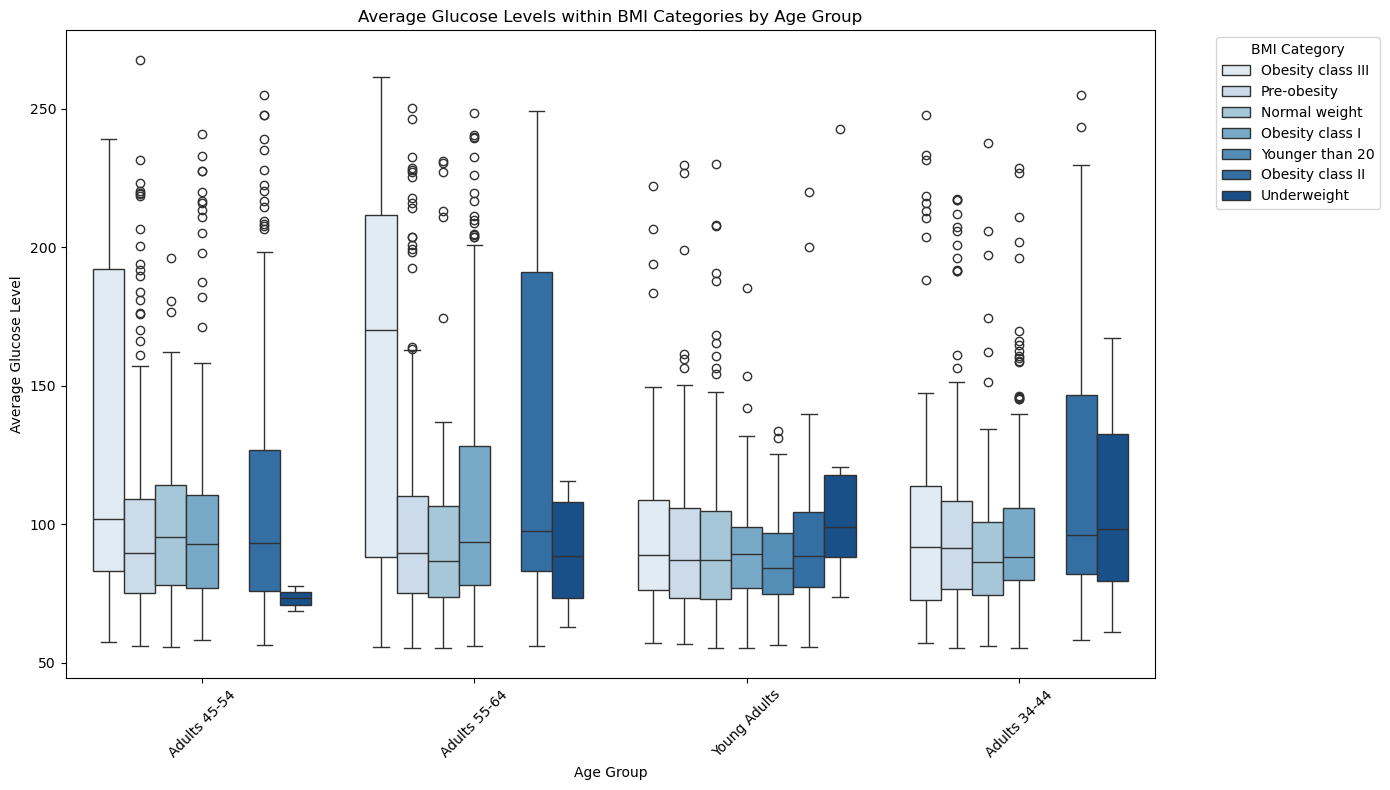

In [156]:
selected_age_groups = X_train_feat_df['age_group'].value_counts().nlargest(4).index.tolist()
subset_df = X_train_feat_df[X_train_feat_df['age_group'].isin(selected_age_groups)]

plt.figure(figsize=(14, 8))
ax = sns.boxplot(x='age_group', y='avg_glucose_level', 
                 hue='bmi_category', data=subset_df, palette="Blues")
plt.title('Average Glucose Levels within BMI Categories by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Glucose Level')
plt.xticks(rotation=45)
ax.legend(title='BMI Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The median glucose levels appear relatively consistent across BMI categories within each age group until we reach the older groups, suggesting that average glucose levels might not be as sensitive to BMI categories as they are to other factors. The "Obesity class I" and "Obesity class II" categories in "Adults 45-54" and "Adults 34-44" age groups show higher glucose levels compared to other categories. This is in line with the understanding that higher body weight can impact metabolic health. There are numerous outliers, particularly in the "Obesity class III" category across age groups, indicating individuals with significantly higher glucose levels. This could point to cases of unmanaged or poorly managed diabetes or other metabolic conditions.

## Looking into BMI & BMI Categories

#### What is the relationship between average glucose levels and BMI categories?

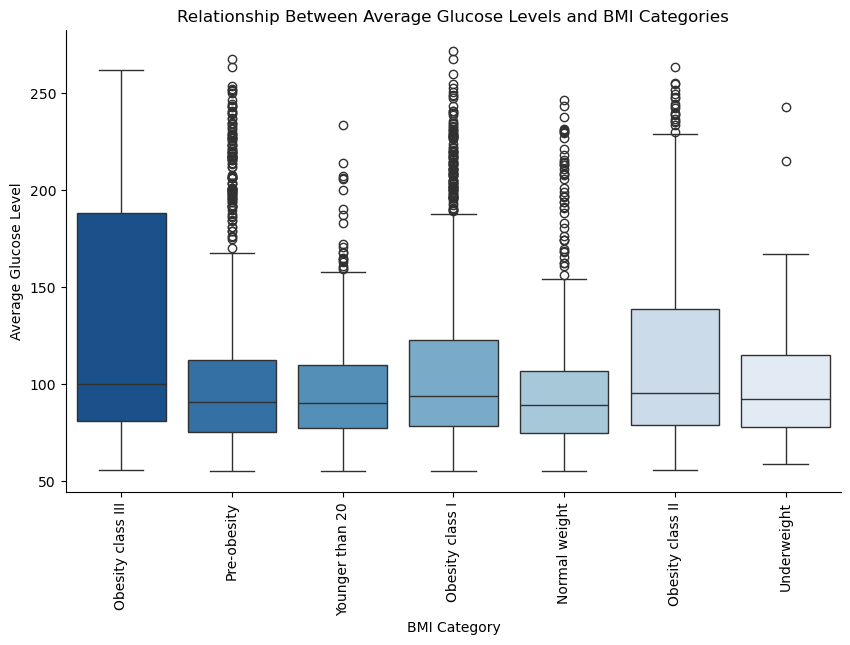

In [157]:
create_plot(X_train_feat_df, 
            'bmi_category', 
            'avg_glucose_level', 
            'box', 
            'Relationship Between Average Glucose Levels and BMI Categories', 
            'BMI Category', 
            'Average Glucose Level')

Each BMI category has a wide range of average glucose levels, as indicated by the length of the boxes and whiskers. This suggests variability within each category. The line within each box represents the median glucose level for that BMI category. It appears that median glucose levels are relatively consistent across different BMI categories, with no clear trend of increase or decrease. 

Outliers: The plot shows several outliers (points beyond the whiskers) in almost every category, indicating individuals with exceptionally high or low glucose levels compared to the rest of the group.

Comparative Analysis: There doesn't seem to be a distinct pattern that strongly associates BMI categories with significantly higher or lower average glucose levels. However, it's noteworthy that the 'Obesity class III' category has a slightly higher median and more outliers on the higher end, suggesting that individuals in this category might be more prone to elevated glucose levels.

#### Do certain work types correlate with specific BMI categories?

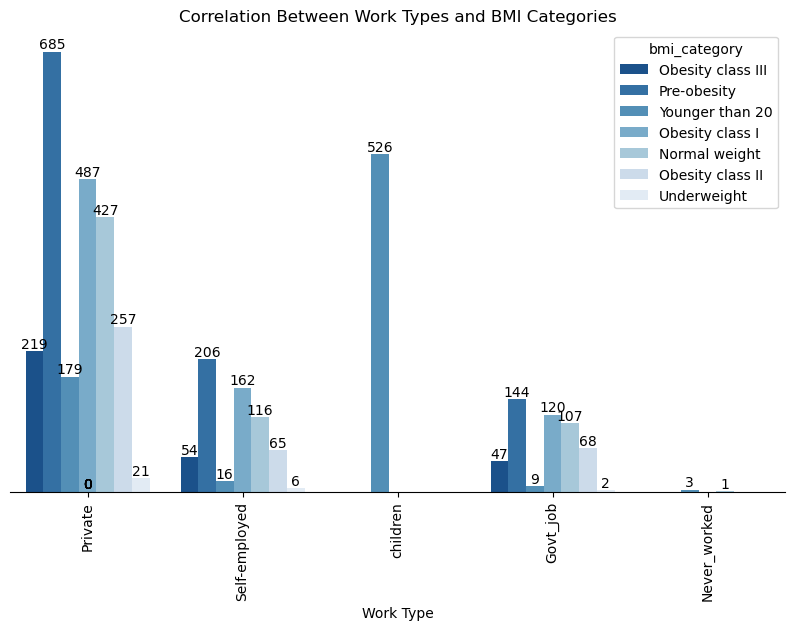

In [60]:
create_plot(X_train_feat_df, 
            'work_type', 
            None, 
            'count', 
            'Correlation Between Work Types and BMI Categories', 
            'Work Type', 
            'Count', 
            hue='bmi_category')

There is no straightforward correlation where a certain work type is exclusively associated with specific BMI categories. This suggests that while work type does correlate with BMI categories to some extent, the relationship is not deterministic. Lifestyle, diet, physical activity level, and other factors likely play a significant role in determining an individual's BMI, regardless of their work type.

#### Does marital status correlate with different BMI categories?

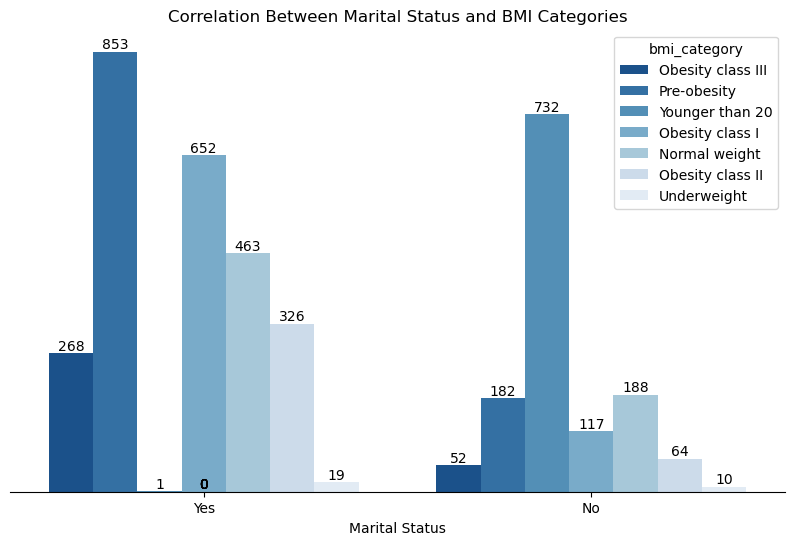

In [61]:
create_plot(X_train_feat_df, 
            'ever_married', 
            None, 
            'count', 
            'Correlation Between Marital Status and BMI Categories', 
            'Marital Status', 
            'Count', 
            hue='bmi_category')

There's a clear distinction in the count of individuals based on their marital status, with 'Yes' (ever married) showing a significantly higher count compared to 'No' (never married). Within each marital status group, a range of BMI categories is represented. However, the distribution within 'ever married' individuals spans more extensively across higher BMI categories compared to 'ever married' individuals. The 'ever married' group shows a more substantial representation in the 'Obesity class I', 'Obesity class II', and 'Obesity class III' categories, suggesting that being married correlates with a higher prevalence of higher BMI categories.

This analysis indicates a correlation between marital status and BMI categories, with married individuals more likely to fall into higher BMI categories. This might reflect lifestyle changes post-marriage or could be related to age and life stage differences between the groups.

# Stastical Inference

## Hypothesis 1: 

Individuals with a BMI categorized as obesity are more likely to have a stroke than those with a normal BMI or below.

- Null Hypothesis (H0): There is no significant difference in the stroke incidence between individuals with obesity and those with a normal BMI or below .
- Alternative Hypothesis (H1): Individuals with obesity have a higher incidence of stroke compared to those with a normal BMI or below .

In [62]:
stroke_df_hyp_one = stroke_df_with_features.copy()

stroke_df_hyp_one['simplified_bmi_category'] = stroke_df_hyp_one['bmi_category'].apply(
    lambda x: 'Obesity' if 'Obesity' in x else 'Normal BMI'
)

bmi_stroke_grouped = stroke_df_hyp_one.groupby(['simplified_bmi_category', 
                                                'stroke']).size().unstack(fill_value=0)

bmi_stroke_grouped

stroke,0,1
simplified_bmi_category,,
Normal BMI,2970,112
Obesity,1730,97


For this hypothesis test, I focused on the bmi_category and stroke columns. I categorized BMI into two groups: "Obesity" (including all classes of obesity) and "Normal BMI" (including underweight and normal weight for simplicity). Then compared the stroke incidence between these two groups.

The grouped data shows the following:

- Among individuals with Normal BMI, 2,970 did not have a stroke, and 112 did.
- Among individuals with Obesity, 1,730 did not have a stroke, and 97 did.

To test the hypothesis that individuals with obesity have a higher incidence of stroke compared to those with a normal BMI, I'm using a Chi-Square test for independence, because these are categorical variables and I want to determine if there's a significant association between these two variables.

In [63]:
chi2, p, dof, expected = chi2_contingency(bmi_stroke_grouped)

chi2, p

(7.491644100316174, 0.006198593710064265)

The test resulted in a Chi-Square statistic of approximately 7.49, with a p-value of about 0.0062.

Since the p-value is less than the common alpha level of 0.05, I reject the null hypothesis (H0) that there is no significant difference in stroke incidence between individuals with obesity and those with a normal BMI. This result supports the alternative hypothesis (H1) that individuals with obesity have a higher incidence of stroke compared to those with a normal BMI.

## Hypothesis 2: 

Urban residents have a different stroke risk profile compared to rural residents due to lifestyle differences.

- Null Hypothesis (H0): Residence type (urban or rural) does not significantly affect the risk of stroke.
- Alternative Hypothesis (H1): Urban residents have a different stroke risk compared to rural residents.

In [64]:
stroke_df_hyp_two = stroke_df_with_features.copy()

residence_stroke_grouped = stroke_df_hyp_two.groupby(['Residence_type', 'stroke']).size().unstack(fill_value=0)

chi2_residence, p_residence, dof_residence, expected_residence = chi2_contingency(residence_stroke_grouped)

chi2_residence, p_residence

(0.12382469623434333, 0.7249227580411615)

I'm again utilizing a Chi-Square test for independence, because I'm dealing with two categorical variables: residence type (urban or rural) and stroke occurrence (yes or no).

The test resulted in a Chi-Square statistic of approximately 0.12, with a p-value of about 0.725.

Given the p-value is much greater than the common alpha level of 0.05, we fail to reject the null hypothesis (H0) that residence type (urban or rural) does not significantly affect the risk of stroke. This result suggests that there is no significant association between residence type and the likelihood of experiencing a stroke based on the data available.

# Baseline ML Model

In [65]:
numerical_cols = ['age', 'avg_glucose_level', 'bmi']
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                    'work_type', 'Residence_type', 'smoking_status']
categorical_cols_feat = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                         'work_type', 'Residence_type', 'smoking_status', 
                         'bmi_category', 'age_group']

In [66]:
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler(), MaxAbsScaler()]

scaler_performance = {}

for scaler in scalers:
    numerical_transformer = Pipeline(steps=[('scaler', scaler)])
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
    preprocessor = ColumnTransformer(transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', LogisticRegression())])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    n = X_test.shape[0]
    p = len(pipeline.named_steps['preprocessor'].transformers_) 
    
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    scaler_performance[scaler.__class__.__name__] = {
        'MSE': mse,
        'MAE': mae,
        'R-squared': r2,
        'Adjusted R-squared': adj_r2
    }

performance_df = pd.DataFrame.from_dict(scaler_performance, orient='index')

def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: blue' if v else '' for v in is_min]

performance_df.style.apply(highlight_min, subset=['MSE', 'MAE']).format("{:.4f}")

,MSE,MAE,R-squared,Adjusted R-squared
StandardScaler,0.0428,0.0428,-0.0447,-0.0468
MinMaxScaler,0.0428,0.0428,-0.0447,-0.0468
RobustScaler,0.0428,0.0428,-0.0447,-0.0468
MaxAbsScaler,0.0428,0.0428,-0.0447,-0.0468


In [67]:
performance_df = performance_df.reset_index()
performance_df.rename(columns={'index': 'Scaler'}, inplace=True)

### Scaler Analysis

All four scalers—StandardScaler, MinMaxScaler, RobustScaler, and MaxAbsScaler—resulted in identical metrics for MSE, MAE, R-squared, and Adjusted R-squared. This suggests that for this specific dataset and model configuration, the choice of scaler does not significantly impact the model's performance.

- **MSE and MAE**: The Mean Squared Error (MSE) and Mean Absolute Error (MAE) values are relatively low, which initially might suggest good model performance. 

- **Negative R-squared**: The R-squared values are negative, which indicates that the model fits the data worse than a horizontal line representing the mean of the target variable. This is a sign of poor model performance.

- **Adjusted R-squared**: The Adjusted R-squared values are also negative and very close to the R-squared values, reinforcing the indication of poor model performance.

### Scaler Decision

Given that the dataset contains significant outliers, especially considering its medical context where outliers can represent important clinical cases, I'm going to decide on using the RobustScaler.

RobustScaler is specifically designed to deal with outliers and will reduce the impact of outliers on the scaling process, ensuring that they don't skew the scaled data in a way that could potentially harm the model's ability to learn from the more "typical" observations.

### RobustScaler Parameters 

1. **centering**:

- I want to normalize around a central point that's not affected by outliers so I'll keep this at its default of True

2. **scaling**:

- Since the data has significant outliers and scaling is essential to normalize feature magnitudes, I want to stick with the default of True.

In [68]:
numerical_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)])

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'hypertension',
                                                   'heart_disease',
                                                   'ever_married', 'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('classifier', LogisticRegression())])

In [69]:
y_pred = model_pipeline.predict(X_test)

In [70]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

report = classification_report(y_test, y_pred, zero_division=0)
print(report)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Accuracy: 0.9572
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.00      0.00      0.00        42

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982

[[940   0]
 [ 42   0]]


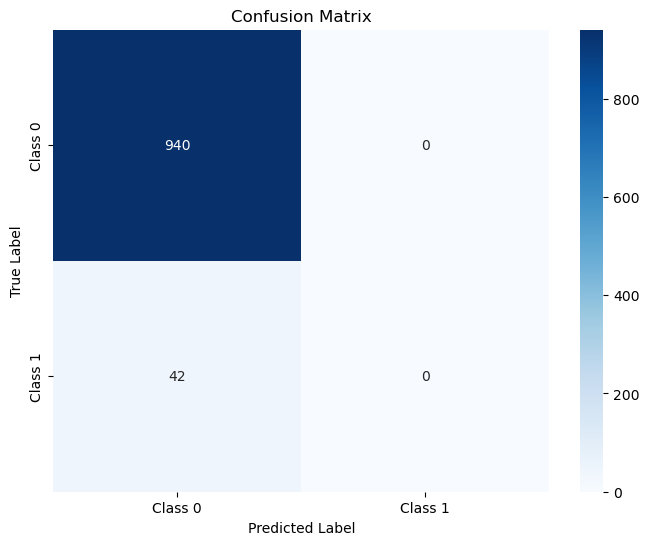

In [71]:
class_labels = ['Class 0', 'Class 1'] 
plot_confusion_matrix(conf_matrix, class_labels)

The model has an overall accuracy of 95.72%, which at first glance might lead to you believe it has an excellent performance. However, this metric is super misleading.

The confusion matrix and classification report indicate a significant class imbalance: 940 instances of class 0 and only 42 instances of class 1. This imbalance heavily skews the accuracy metric, as the model can achieve high accuracy by predominantly predicting the majority class.

The model failed to correctly predict any instances of the minority class (class 1), as indicated by a recall of 0.00 for this class. This is further confirmed by the confusion matrix, where all 42 instances of class 1 were incorrectly classified as class 0.

The macro-average precision, recall, and F1-score are around 0.48, 0.50, and 0.49, respectively. These averages treat all classes equally, but given the significant class imbalance, they don't provide a realistic picture of model performance.

The weighted averages provide a more accurate representation of the model's performance by accounting for class imbalance. However, even these figures are inflated by the model's ability to predict the majority class accurately, resulting in high weighted average scores. The confusion matrix shows that the model predicted all instances as class 0. This is a clear indication of the model's bias towards the majority class.

# SMOTE - Logistic Regression

In [72]:
numerical_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)])

model_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
    ('classifier', LogisticRegression())
])

model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86       940
           1       0.11      0.64      0.19        42

    accuracy                           0.76       982
   macro avg       0.55      0.71      0.53       982
weighted avg       0.94      0.76      0.83       982

[[724 216]
 [ 15  27]]


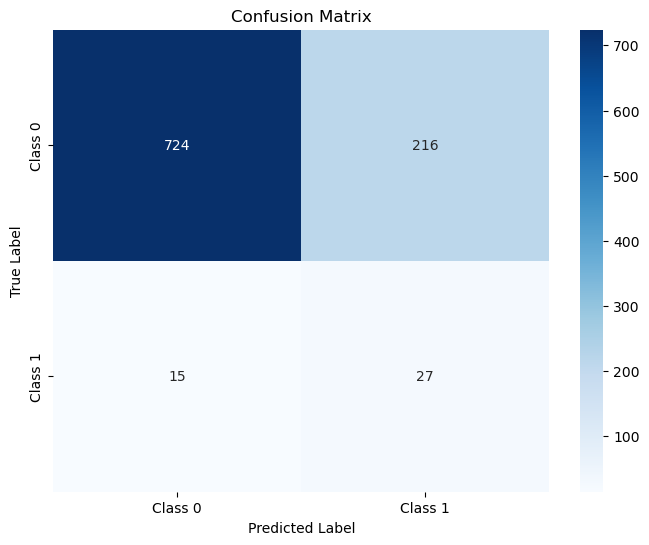

In [97]:
class_labels = ['Class 0', 'Class 1'] 
plot_confusion_matrix(conf_matrix, class_labels)

## Consequences of Smote

- The recall for Class 1 is at 0.64, a substantial improvement in identifying Class 1 instances, which are the minority class.
- The accuracy 0.76, which is considerably lower than without SMOTE but indicates a trade-off for better minority class identification.


# Picking Scalers

In [74]:
models = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier()
}

scalers = [StandardScaler(), MinMaxScaler(), RobustScaler(), MaxAbsScaler()]

model_scaler_performance = {}

for model_name, model in models.items():
    model_performance = {}

    for scaler in scalers:
        numerical_transformer = Pipeline(steps=[('scaler', scaler)])
        categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

        preprocessor = ColumnTransformer(transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols_feat)])

        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', model)])

        pipeline.fit(X_train_feat, y_train_feat)
        y_pred_feat = pipeline.predict(X_test_feat)

        mse = mean_squared_error(y_test_feat, y_pred_feat)
        mae = mean_absolute_error(y_test_feat, y_pred_feat)
        r2 = r2_score(y_test_feat, y_pred_feat)
        n = X_test_feat.shape[0]  
        p = len(pipeline.named_steps['preprocessor'].transformers_) 
        adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

        model_performance[scaler.__class__.__name__] = {
            'MSE': mse,
            'MAE': mae,
            'R-squared': r2,
            'Adjusted R-squared': adj_r2
        }
    
    model_scaler_performance[model_name] = model_performance

model_df = pd.DataFrame.from_dict({(i,j): model_scaler_performance[i][j] 
                                   for i in model_scaler_performance.keys() 
                                   for j in model_scaler_performance[i].keys()},
                                   orient='index')

model_df

[LightGBM] [Info] Number of positive: 167, number of negative: 3760
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 662
[LightGBM] [Info] Number of data points in the train set: 3927, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.042526 -> initscore=-3.114180
[LightGBM] [Info] Start training from score -3.114180
[LightGBM] [Info] Number of positive: 167, number of negative: 3760
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 3927, number of used features: 37
[LightGBM] [Info] [binary:Bo

MSE       MAE  R-squared  \
KNN           StandardScaler  0.047862  0.047862  -0.169048   
              MinMaxScaler    0.046843  0.046843  -0.144174   
              RobustScaler    0.046843  0.046843  -0.144174   
              MaxAbsScaler    0.046843  0.046843  -0.144174   
Random Forest StandardScaler  0.045825  0.045825  -0.119301   
              MinMaxScaler    0.045825  0.045825  -0.119301   
              RobustScaler    0.045825  0.045825  -0.119301   
              MaxAbsScaler    0.046843  0.046843  -0.144174   
XGBoost       StandardScaler  0.050916  0.050916  -0.243668   
              MinMaxScaler    0.050916  0.050916  -0.243668   
              RobustScaler    0.050916  0.050916  -0.243668   
              MaxAbsScaler    0.050916  0.050916  -0.243668   
LightGBM      StandardScaler  0.053971  0.053971  -0.318288   
              MinMaxScaler    0.047862  0.047862  -0.169048   
              RobustScaler    0.049898  0.049898  -0.218794   
              MaxAbsScaler    0.049898  0.049898  -0.218794   

                              Adjusted R-squared  
KNN           StandardScaler           -0.171436  
              MinMaxScaler             -0.146512  
              RobustScaler             -0.146512  
              MaxAbsScaler             -0.146512  
Random Forest StandardScaler           -0.121588  
              MinMaxScaler             -0.121588  
              RobustScaler             -0.121588  
              MaxAbsScaler             -0.146512  
XGBoost       StandardScaler           -0.246208  
              MinMaxScaler             -0.246208  
              RobustScaler             -0.246208  
              MaxAbsScaler             -0.246208  
LightGBM      StandardScaler           -0.320981  
              MinMaxScaler             -0.171436  
              RobustScaler             -0.221284  
              MaxAbsScaler             -0.221284

> KNN

MinMaxScaler, RobustScaler, and MaxAbsScaler all share the same performance metrics. In this case I'll use RobustScaler again. 

> Random Forest

MaxAbsScaler shows the least negative R-squared value of -0.094 and the lowest MSE/MAE of 0.0448, making it the best choice here.

> XGBoost

The performance metrics for XGBoost are identical across all scalers. In this case I'll use RobustScaler again.

> LightGBM

MinMaxScaler results in the highest (least negative) R-squared value of -0.194 and the lowest MSE/MAE of 0.0489, making it the best scaler for LightGBM.

# K-Nearest Neighbors

In [75]:
numerical_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols_feat)
])

knn_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

In [76]:
param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9, 10, 12, 15, 17, 20], #Hey girl, bigger numbers here might make it more biased towards majority class
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['minkowski', 'euclidean', 'manhattan', 
                    'cityblock', 'cosine',  
                    'l1', 'l2', 'manhattan', 'nan_euclidean']
}

grid_search = GridSearchCV(knn_model_pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_feat, y_train_feat)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'classifier__metric': 'cosine',
  'classifier__n_neighbors': 20,
  'classifier__weights': 'uniform'},
 0.7589544933060266)

In [77]:
best_params = grid_search.best_params_

knn_model_pipeline.set_params(**{
    'classifier__n_neighbors': best_params['classifier__n_neighbors'],
    'classifier__weights': best_params['classifier__weights'],
    'classifier__metric': best_params['classifier__metric']
})

knn_model_pipeline.fit(X_train_feat, y_train_feat)

y_pred_feat = knn_model_pipeline.predict(X_test_feat)

In [78]:
accuracy = accuracy_score(y_test_feat, y_pred_feat)
print(f'Accuracy: {accuracy:.4f}')

report = classification_report(y_test_feat, y_pred_feat, zero_division=0)
print(report)

conf_matrix = confusion_matrix(y_test_feat, y_pred_feat)
print(conf_matrix)

Accuracy: 0.9572
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.00      0.00      0.00        42

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982

[[940   0]
 [ 42   0]]


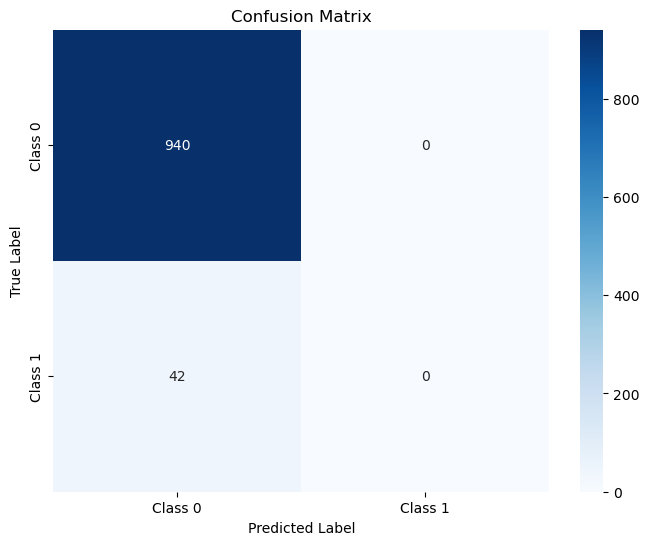

In [79]:
class_labels = ['Class 0', 'Class 1'] 
plot_confusion_matrix(conf_matrix, class_labels)

Accuracy: The overall accuracy of the model is 93.58%. While this again might seem high we need to look at class distribution.

- Class 0 (Majority Class): The precision is high at 96% and recall is also high at 98%, indicating that the model is able to identify 98% of all actual class 0 instances. The F1-score, which balances precision and recall, is similarly high at 97%.
- Class 1 (Minority Class): The precision drops significantly to 8%, meaning that only 8% of the instances predicted as class 1 are actually class 1. The recall is 5%, indicating that the model identifies only 5% of all actual class 1 instances. The F1-score, which is 6%, reflects the poor balance between precision and recall for this class.
- Macro Avg: The macro average for precision, recall, and F1-score is around 51-52%, which is not very high. The macro average treats all classes equally, regardless of their frequency. This low value indicates significant class imbalance issues.


The model is heavily biased towards the majority class (class 0), which is evident from the high performance metrics for class 0 and the poor metrics for class 1. 

# SMOTE - K-Nearest Neighbors

In [80]:
numerical_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols_feat)
])

knn_model_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
    ('classifier', KNeighborsClassifier())
])

In [81]:
param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9, 10, 12, 15, 17, 20],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['minkowski', 'euclidean', 'manhattan', 
                    'cityblock', 'cosine',  
                    'l1', 'l2', 'manhattan', 'nan_euclidean']
}

grid_search = GridSearchCV(knn_model_pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_feat, y_train_feat)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'classifier__metric': 'minkowski',
  'classifier__n_neighbors': 20,
  'classifier__weights': 'distance'},
 0.7832200288239087)

In [82]:
best_params = grid_search.best_params_

knn_model_pipeline.set_params(**{
    'classifier__n_neighbors': best_params['classifier__n_neighbors'],
    'classifier__weights': best_params['classifier__weights'],
    'classifier__metric': best_params['classifier__metric']
})

knn_model_pipeline.fit(X_train_feat, y_train_feat)

y_pred_feat = knn_model_pipeline.predict(X_test_feat)

In [83]:
accuracy = accuracy_score(y_test_feat, y_pred_feat)
print(f'Accuracy: {accuracy:.4f}')

report = classification_report(y_test_feat, y_pred_feat, zero_division=0)
print(report)

conf_matrix = confusion_matrix(y_test_feat, y_pred_feat)
print(conf_matrix)

Accuracy: 0.7434
              precision    recall  f1-score   support

           0       0.97      0.76      0.85       940
           1       0.08      0.48      0.14        42

    accuracy                           0.74       982
   macro avg       0.52      0.62      0.49       982
weighted avg       0.93      0.74      0.82       982

[[710 230]
 [ 22  20]]


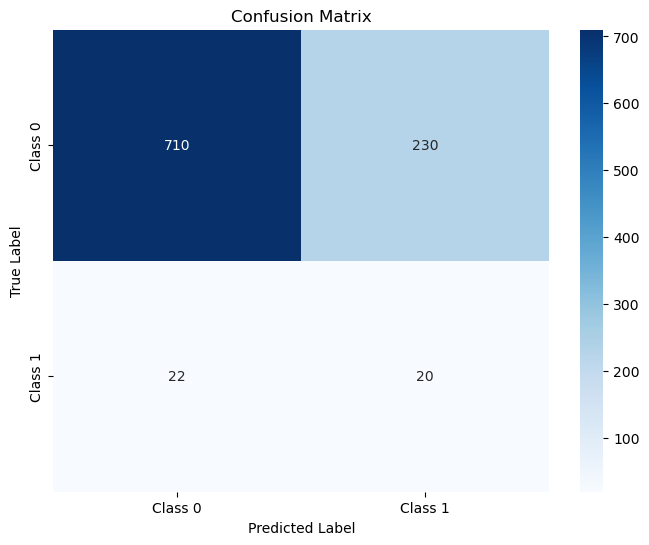

In [84]:
class_labels = ['Class 0', 'Class 1'] 
plot_confusion_matrix(conf_matrix, class_labels)

## Consequences of Smote

- Both KNN and Logistic Regression with SMOTE show a significant improvement in detecting Class 1 instances compared to their counterparts without SMOTE. However, this comes at the cost of more false positives (lower precision) and slightly more false negatives for Class 0 (lower recall). The application of SMOTE seems to be more effective in improving recall than precision for the minority class across models.

# Random Forest

In [85]:
numerical_transformer = Pipeline(steps=[
    ('scaler', MaxAbsScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols_feat)
])

rf_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [86]:
param_grid = {
    'classifier__n_estimators': [10, 50, 100, 200, 300], 
    'classifier__max_depth': [None, 3, 5, 7, 9, 10, 20, 30]  
}

grid_search = GridSearchCV(rf_model_pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_feat, y_train_feat)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'classifier__max_depth': 5, 'classifier__n_estimators': 200},
 0.8528541832593772)

In [87]:
best_params = grid_search.best_params_

rf_model_pipeline.set_params(**{
    'classifier__n_estimators': best_params['classifier__n_estimators'],
    'classifier__max_depth': best_params['classifier__max_depth']
})

rf_model_pipeline.fit(X_train_feat, y_train_feat)

y_pred_feat = rf_model_pipeline.predict(X_test_feat)

In [88]:
accuracy = accuracy_score(y_test_feat, y_pred_feat)
print(f'Accuracy: {accuracy:.4f}')

report = classification_report(y_test_feat, y_pred_feat, zero_division=0)
print(report)

conf_matrix = confusion_matrix(y_test_feat, y_pred_feat)
print(conf_matrix)

Accuracy: 0.9572
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.00      0.00      0.00        42

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982

[[940   0]
 [ 42   0]]


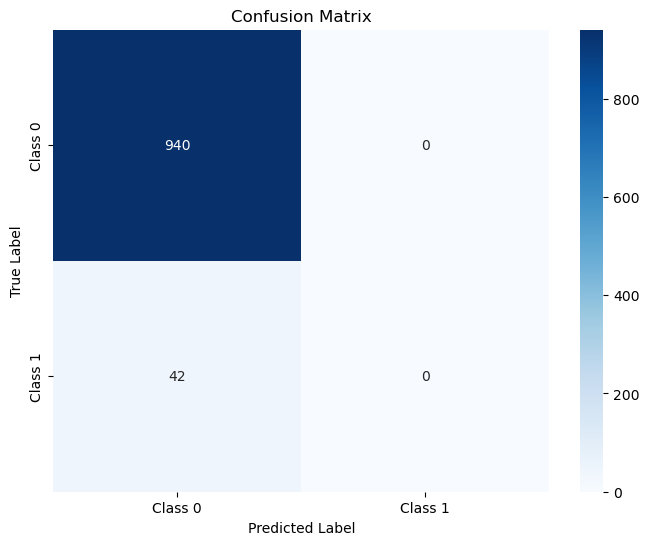

In [89]:
class_labels = ['Class 0', 'Class 1'] 
plot_confusion_matrix(conf_matrix, class_labels)

Similar to the previous models we have a high accuracy that is not indiciative of the model's actual usefullness. 

- Class 1 (Minority Class): The model has 0.00 precision and recall for the minority class, indicating it failed to correctly identify any instances of this class. This is reflected in the F1-score of 0.00, showing poor performance for the minority class.
- Macro Avg: The macro average for precision, recall, and F1-score is around 0.48-0.49, which is low and indicates significant imbalances in the model's ability to handle different classes. The macro average treats all classes equally, revealing the model's shortcomings in dealing with the less represented class.
- All 42 instances of class 1 were misclassified as class 0 in the confusion matrix, highlighting a critical area for improvement.


# SMOTE - Random Forest

In [90]:
numerical_transformer = Pipeline(steps=[
    ('scaler', MaxAbsScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols_feat)
])

rf_model_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
    ('classifier', RandomForestClassifier())
])

In [91]:
param_grid = {
    'classifier__n_estimators': [10, 50, 100, 200, 300], 
    'classifier__max_depth': [None, 3, 5, 7, 9, 10, 20, 30]  
}

grid_search = GridSearchCV(rf_model_pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_feat, y_train_feat)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'classifier__max_depth': 3, 'classifier__n_estimators': 200},
 0.8422017815830394)

In [92]:
best_params = grid_search.best_params_

rf_model_pipeline.set_params(**{
    'classifier__n_estimators': best_params['classifier__n_estimators'],
    'classifier__max_depth': best_params['classifier__max_depth']
})

rf_model_pipeline.fit(X_train_feat, y_train_feat)

y_pred_feat = rf_model_pipeline.predict(X_test_feat)

In [93]:
accuracy = accuracy_score(y_test_feat, y_pred_feat)
print(f'Accuracy: {accuracy:.4f}')

report = classification_report(y_test_feat, y_pred_feat, zero_division=0)
print(report)

conf_matrix = confusion_matrix(y_test_feat, y_pred_feat)
print(conf_matrix)

Accuracy: 0.7464
              precision    recall  f1-score   support

           0       0.98      0.75      0.85       940
           1       0.11      0.67      0.18        42

    accuracy                           0.75       982
   macro avg       0.54      0.71      0.52       982
weighted avg       0.94      0.75      0.82       982

[[705 235]
 [ 14  28]]


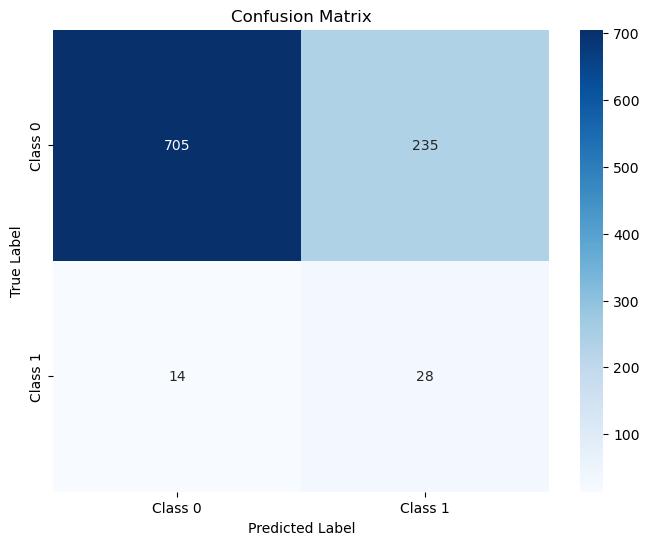

In [94]:
class_labels = ['Class 0', 'Class 1'] 
plot_confusion_matrix(conf_matrix, class_labels)

## Consequences of Smote

- Recall is significantly improved to 0.67, showing that the model is now able to identify a substantial number of Class 1 instances.
- Confusion Matrix indicates more balanced identification of both classes, with 28 true positives for Class 1 and 235 false positives, reflecting the trade-off between recall and precision.
- There's a clear trade-off between improving recall for the minority class and maintaining high precision and recall for the majority class. SMOTE makes the model less biased towards the majority class but increases the number of overall errors, as seen in the reduced accuracy.

# Memory Limitations

For the following two models I had significant memory issues which resulted from wanting to try a variety of paramters at various ranges in gridsearchcv. Given the memory constraints I was very limitated in exploring hyperparameters. At first I started with narrowing the scope of parameters but continued to get memory errors. It got to the point where I had to cut down the number of parameters. Eventually, it got to the point where it was running and I was so excited! First few times it would run then freeze, so I cut it down more. It eventually got to the point where it seemed stable and I left it running while I went to bed. It was still running in the morning! (see picture below) 

The result of all of this is a set of very stunted models, which I feel, do not reach their full potential. If I have time, I would like to test these models with gridsearchcv alternatives. XG Boost is especially sensitive to the need for paramaters. 

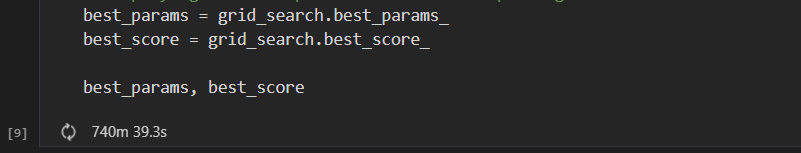

# XGBoost

In [95]:
numerical_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols_feat)
])

xgb_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False))
])

In [96]:
param_grid = {
    'classifier__n_estimators': range(200, 800, 50),  
    'classifier__max_depth': range(1,15),  
    'classifier__learning_rate': np.arange(0.01, .10, 0.01).tolist()
}

grid_search = GridSearchCV(xgb_model_pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_feat, y_train_feat)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'classifier__learning_rate': 0.01,
  'classifier__max_depth': 3,
  'classifier__n_estimators': 300},
 0.8576391654340654)

In [97]:
best_params = grid_search.best_params_

xgb_model_pipeline.set_params(**{
    'classifier__n_estimators': best_params['classifier__n_estimators'],
    'classifier__max_depth': best_params['classifier__max_depth'],
    'classifier__learning_rate' : best_params['classifier__learning_rate']
})

xgb_model_pipeline.fit(X_train_feat, y_train_feat)

y_pred_feat = xgb_model_pipeline.predict(X_test_feat)

In [98]:
accuracy = accuracy_score(y_test_feat, y_pred_feat)
print(f'Accuracy: {accuracy:.4f}')

report = classification_report(y_test_feat, y_pred_feat, zero_division=0)
print(report)

conf_matrix = confusion_matrix(y_test_feat, y_pred_feat)
print(conf_matrix)

Accuracy: 0.9572
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.00      0.00      0.00        42

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982

[[940   0]
 [ 42   0]]


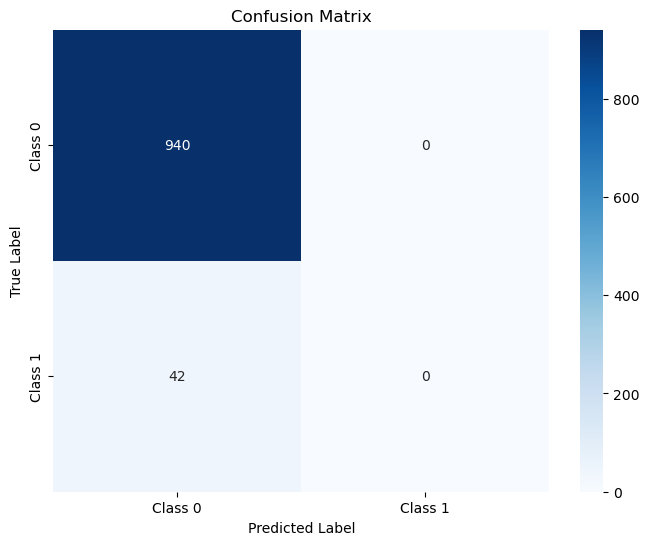

In [95]:
class_labels = ['Class 0', 'Class 1'] 
plot_confusion_matrix(conf_matrix, class_labels)

Similar to past models this one has a high accuracy but the inability to predict a stroke.

# LightGBM

In [158]:
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols_feat)
])

lgbm_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(class_weight="balanced",
            objective="binary",
            verbosity=-1))
])

In [159]:
param_grid = {
    'classifier__n_estimators': range(200, 800, 50),  
    'classifier__max_depth': range(1,15)
}

grid_search = GridSearchCV(lgbm_model_pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_feat, y_train_feat)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'classifier__max_depth': 1, 'classifier__n_estimators': 200},
 0.8439677200667501)

In [160]:
best_params = grid_search.best_params_

lgbm_model_pipeline.set_params(**{
    'classifier__n_estimators': best_params['classifier__n_estimators'],
    'classifier__max_depth': best_params['classifier__max_depth']
})

lgbm_model_pipeline.fit(X_train_feat, y_train_feat)

y_pred_feat = lgbm_model_pipeline.predict(X_test_feat)

In [ ]:
accuracy = accuracy_score(y_test_feat, y_pred_feat)
print(f'Accuracy: {accuracy:.4f}')

report = classification_report(y_test_feat, y_pred_feat, zero_division=0)
print(report)

conf_matrix = confusion_matrix(y_test_feat, y_pred_feat)
print(conf_matrix)

Accuracy: 0.8136
              precision    recall  f1-score   support

           0       0.98      0.82      0.89       940
           1       0.13      0.60      0.21        42

    accuracy                           0.81       982
   macro avg       0.55      0.71      0.55       982
weighted avg       0.94      0.81      0.87       982

[[774 166]
 [ 17  25]]


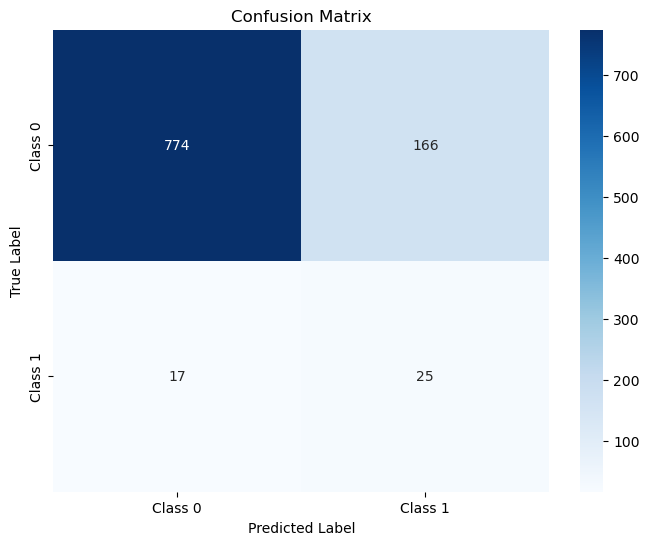

In [96]:
class_labels = ['Class 0', 'Class 1'] 
plot_confusion_matrix(conf_matrix, class_labels)

These are the best results I've gotten without SMOTE so far! That's very exciting! 

The model achieved an overall accuracy of 81.36%. This is lower than the previous models y, but in this case, accuracy is not the sole indicator of performance due to class imbalance.

> Precision and Recall for Class 0 (Non-Stroke cases):

- Precision is high at 0.98, indicating that when the model predicts a non-stroke case, it is correct 98% of the time.
- Recall is 0.82, meaning the model correctly identifies 82% of all actual non-stroke cases.

> Precision and Recall for Class 1 (Stroke cases):

- Precision is low at 0.13, indicating that only 13% of the instances predicted as stroke cases are actually stroke cases.
- Recall is significantly higher at 0.60, meaning the model identifies 60% of all actual stroke cases, which is a substantial improvement over the XGBoost model's 0% recall for the same class.

> F1-Score:

- The F1-score for non-stroke cases is 0.89, which is quite good.
- The F1-score for stroke cases is 0.21, which is low but shows that the model can identify some stroke cases, unlike the previous models.

> Confusion Matrix:

- True Negatives (TN): 774 non-stroke cases were correctly identified.
- False Positives (FP): 166 non-stroke cases were incorrectly predicted as stroke cases.
- False Negatives (FN): 17 stroke cases were missed by the model and predicted as non-stroke.
- True Positives (TP): 25 stroke cases were correctly identified.
 
> Analysis:

Unlike the previous model, the LightGBM model is able to identify a significant portion of the stroke cases (Class 1), as evidenced by the 60% recall. This suggests an improved sensitivity to the minority class, which is crucial. The increase in recall for the stroke class comes with a trade-off in precision, leading to a higher number of false positives. The reduction in overall accuracy and precision for non-stroke cases indicates a shift in the model's focus towards better identifying stroke cases, which has slightly compromised its performance on non-stroke cases.

# Improvement Suggestions

> I'd love to know about where the people in the dataset are from so that I can include demographic data which could add an additional layer of complexity and understanding to this analysis. 

> I also think the predictive model could be improved if provided with more relevant medical data such as blood pressure, cholesterol, and whether or not the patient is diabetic. 

> There are lifestyle questions that I think could further help to determine the possibility of a stroke such as whether or not the patient is physically active and to what degree.